# <center style="color:blue;"> Imblance Bank Loan Data Set </center>

<h1>Use Case : </h1>
<p>The bank wants to explore ways of converting its liability customers to personal loan customers (while retaining them as depositors). A campaign that the bank ran last year for liability customers showed a conversion rate of over 9% success. This has encouraged the retail marketing department to devise campaigns with better target marketing to increase the success ratio with minimal budget.</p>

<h3>Objective:</h3> <p>Using the Data set, help to build a Machine Learning Model which can predict if a Customer would take up Personal Loan if the targetted Marketing Campaign is done.</p>

### Data set Description:

<table style="width:100%;">
  <tr><th style="text-align: left;">Variable Name</th><th style="text-align: left;">Description</th></tr>
  <tr><td style="text-align: left;">ID</td><td style="text-align: left;">Customer ID</td></tr>
  <tr><td style="text-align: left;">Age</td><td style="text-align: left;">Customer Age(Years)</td></tr>
  <tr><td style="text-align: left;">Experience</td><td style="text-align: left;">Professional Experience(Years)</td></tr>
  <tr><td style="text-align: left;">Income</td><td style="text-align: left;">Annual Income (USD 1000)</td></tr>
  <tr><td style="text-align: left;">Postal Code</td><td style="text-align: left;">Postal Code of the Customer Home Address</td></tr>
  <tr><td style="text-align: left;">Family Size</td><td style="text-align: left;">Family Size of the Customer</td></tr>
  <tr><td style="text-align: left;">CCAvgSpending</td><td style="text-align: left;">Credit Card Avg Spending per Month(USD 1000)</td></tr>
  <tr><td style="text-align: left;">Education</td><td style="text-align: left;">Customer Education Level(Undergrad,Graduate,Advanced Degree)</td></tr>
  <tr><td style="text-align: left;">Mortgage</td><td style="text-align: left;">Value of Home Mortgage if any. (USD 1000)</td></tr>
  <tr><td style="text-align: left;">Investment Account</td><td style="text-align: left;">Customer has Investment Account with the bank (1= Yes, 0=No)</td></tr>
  <tr><td style="text-align: left;">Deposit Account</td><td style="text-align: left;">Customer has Deposit Account with the bank (1=Yes,0=No)</td></tr>
  <tr><td style="text-align: left;">InternetBanking</td><td style="text-align: left;">Customer use Internet Banking (Yes,No)</td></tr>
  <tr><td style="text-align: left; color:blue">Personal Loan (Target Variable) </td><td style="text-align: left;">Did the customer accept the personal loan offered in the last Campaign? (Yes,No) </td></tr>
</table>


#### Expected Output(Below are some of the Tips/suggestions and anything that can aid the explanation of the approach):								
* Analysis of the data								
* Data Processing if any								
* Modelling Approach(Modelling techniques used atleast 2 different modelling techniques and their comparision on different Model Evaluation metrics)								
* Coding scripts along with output(Jupyter notebook with the outputs included). Please Use Python for coding.
* Summary of the Analysis and recommendations if any(using presentation slides) 	


**Import All the required Libraries**

In [1]:
# To enable plotting graphs in Jupyter notebook
%matplotlib inline

# Importing libraries
import pandas as pd
from sklearn.linear_model import LogisticRegression

# importing ploting libraries
import matplotlib.pyplot as plt   

#importing seaborn for statistical plots
import seaborn as sns

#Let us break the X and y dataframes into training set and test set. For this we will use
#Sklearn package's data splitting function which is based on random function

from sklearn.model_selection import train_test_split

import numpy as np
#import os,sys
from scipy import stats

# calculate accuracy measures and confusion matrix
from sklearn import metrics

import warnings
warnings.filterwarnings("ignore")

import pandas_profiling


In [2]:
import os
os.getcwd()

'C:\\Users\\kumarmritunj\\Desktop\\Misc\\Learning\\Learning\\Assesment-1'

**Read the dataset for Data Understanding**

In [3]:
path = r"/Users/mritunjaykumar/Desktop/MJ_Learning/Interviews/May Bank/DS_assessment.xlsx"
path = r"C:\Users\kumarmritunj\Desktop\Misc\Learning\Learning\Assesment-1\DS_assessment.xlsx"
print("\nPath - ", path)

personal_loan_data = pd.read_excel(path, sheet_name = 1)
personal_loan_data.head()


Path -  C:\Users\kumarmritunj\Desktop\Misc\Learning\Learning\Assesment-1\DS_assessment.xlsx


ID  Age  Experience  Income  Postal Code  Family Size  CCAvgSpending  \
0   1   25           1    49.0        91107          4.0            1.6   
1   2   45          19    34.0        90089          3.0            1.5   
2   3   39          15    11.0        94720          1.0            1.0   
3   4   35           9     NaN        94112          1.0            2.7   
4   5   35           8    45.0        91330          4.0            1.0   

   Education  Mortgage  Investment Account  Deposit Account InternetBanking  \
0  Undergrad         0                   1                0              NO   
1  Undergrad         0                   1                0              NO   
2  Undergrad         0                   0                0              NO   
3   Graduate         0                   0                0              NO   
4   Graduate         0                   0                0              NO   

  Personal Loan  
0            NO  
1            NO  
2            NO  
3            NO  
4            NO

In [4]:
?pd.read_excel

In [5]:
personal_loan_data.profile_report()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

### Personal Loan Dataset Observation using pandas-profiling
* Total **5000** unique customers with **13** parameters as mentioned below: 
	- **7** columns are numeric (ID, Age, Experience, Income, Postal Code, CCAvgSpending, Mortgage)
	- **4** columns are boolean (Investment Account, Deposit Account, Internet Banking, Personal Loan)
	- **2** columns are categorical (Family Size, Education)
    
     * Actually, Postal Code is not numeric, it's a categorical variables for customers Address Postal Code and can be identify by zip codes library.
     

* Overall we have **7** categorical variables including binary ones. (Postal Code, Family Size, Education, Investment Account, Deposit Account, Internet Banking, Personal Loan)

* ***Duplicate check :*** This dataset contains **0** duplicate records.

* ***Multi-Collinearity :*** Age and Experience, both are independent variables and highly correlated . So while building the model, we need to drop one.

* ***ID :*** **5000** unique customers.

* ***Age :***  Customers of age are in between **23** and **67**. **23** being minimum and **67** is the max.

* ***Experience :*** Experience of customers are in between **-3** to **43**.  It seems like dataset has invalid entry in this columns in terms of negative (Experience can’t be negative) so we need to impute these negative value). To impute this, we can any of the below methods:
    1. Replace negative experience with mean, median 
    2. Take the absolute value of experience 
    3. Or Find age and education for each negative experience value and the take mean of all the experiences corresponding to the age and education (which was fetched now for a negative experience for a customer)

    ****We will be using the 3rd options****

****We are considering mean because, this experience is symmetrically distributed (kind of have normal distribution). 
    Median is good for skewed data.****
    

* ***Income :*** Income is left skewed and has **20** missing data points, required imputation on this too. This is annual income of customer ranging from **8000 USD** to **224000 USD** Insightes:
    1. We need to impute the missing data (KNNImputer, SimpleImputer or manually using age, experience, education combination aggregation)
    2. Can go with data transformation to make it normal distribution for better modelling or
    3. Can do a feature engineering to create a new columns with low income, medium income or high income.

    ****We will go with 1st and 3rd options!****
    

* ***Postal Code :*** Address of each customers. Has **467** unique postal code. Below are the high level observation:
    1. We will get the city name for each postal code.
    2. Then we will segregate into regions for each city as a part of feature engineering 

* ***Family Size :*** No of family member for each customer ranging from **1** to **4**, single member family is of **29%**, followed by **2 member - 25.8%**, **3 members - 24.4%** and **4 members - 20.2%**.We can see, we have **9** missing value for this columns. We need to impute this too. 
	- We will find the age, experience, education for missing family size for a customer and then take mode of family size for all customer which belong to same ****age-experience-education**** group.

* ***CCAvgSpending :*** Credit Card Avg Spending per Month for a customer. We don’t have any missing value but this data is left skewed too. Observation below:
	- This is monthly data and income is in annual, so we will do feature engineering and create a new columns call Anual ****CCAvgSpending by multiplying 12 * CCAvgSpending**** .
	- Then We an do data transformation or feature engineering again like low spender, medium spender or high spender.

* ***Education :*** This has **3** level of degree, Undergrad, Graduate and Advance Degree with no missing value. Undergrad being the most with value **2096 (42% bachelor)** and graduate being the least with **1403 value (28%)** and **30% is of Advance degree**.

* ***Mortgage :*** Mortgage data is highly left skewed with **skewness 2.1**. here with highest value of **635000 USD** and least mortgage is **0 USD**. We have **mean mortgage of 56.5** and **SD is 101.7**. Observation : 
    1. It seems like we have many outliers with **kurtosis value of 4.76** (either we can drop those outliers or can keep it as in real world too, we do have customers with higher mortgage, we let model to learn from these.)
    2. To find outliers, we can use z-score on this dataset, any data points which is more than **3 standard deviation**, we will consider that as outliers.

* ***Investment Account :*** Total **89.6%** of customer doesn’t have investment account with the bank and **10.4%** of customers does have account. We don’t see any missing value for this column.

* ***Deposit Account :*** Total **94%** of customer doesn’t have Deposit account with the bank and **6%** of customers does have account. We don’t see any missing value for this column.

* ***Internet Banking :*** No missing value and **59.7%** of customers has internet banking facilities and **40.3%** doesn’t have.

* ***Personal Loan :***  Finally Target variable, This has **90.4%** of customers who doesn’t opted the personal loan in last campaign and **9.6%** customer took. This observation convey that we have ***highly imbalance data set*** for modelling. If our all prediction will be wrong then still the model accuracy will be **90.4% which is baseline model accuracy**.

#### ****So to build a good model, the model accuracy should be more than baseline model.****
<br><br>




**Now Exploratory Data Analysis**

Aligning the columns using underscore.

In [6]:
print("Columns name - ", personal_loan_data.columns)
personal_loan_data.columns = ["ID","Age","Experience","Income","PostalCode","FamilySize","CCAvgSpending","Education","Mortgage","InvestmentAccount","DepositAccount","InternetBanking","PersonalLoan"]
personal_loan_data.head(10)


Columns name -  Index(['ID', 'Age', 'Experience', 'Income', 'Postal Code', 'Family Size',
       'CCAvgSpending', 'Education', 'Mortgage', 'Investment Account',
       'Deposit Account', 'InternetBanking', 'Personal Loan'],
      dtype='object')


ID  Age  Experience  Income  PostalCode  FamilySize  CCAvgSpending  \
0   1   25           1    49.0       91107         4.0            1.6   
1   2   45          19    34.0       90089         3.0            1.5   
2   3   39          15    11.0       94720         1.0            1.0   
3   4   35           9     NaN       94112         1.0            2.7   
4   5   35           8    45.0       91330         4.0            1.0   
5   6   37          13    29.0       92121         4.0            0.4   
6   7   53          27    72.0       91711         2.0            1.5   
7   8   50          24    22.0       93943         1.0            0.3   
8   9   35          10    81.0       90089         3.0            0.6   
9  10   34           9   180.0       93023         1.0            8.9   

         Education  Mortgage  InvestmentAccount  DepositAccount  \
0        Undergrad         0                  1               0   
1        Undergrad         0                  1               0   
2        Undergrad         0                  0               0   
3         Graduate         0                  0               0   
4         Graduate         0                  0               0   
5         Graduate       155                  0               0   
6         Graduate         0                  0               0   
7  Advanced Degree         0                  0               0   
8         Graduate       104                  0               0   
9  Advanced Degree         0                  0               0   

  InternetBanking PersonalLoan  
0              NO           NO  
1              NO           NO  
2              NO           NO  
3              NO           NO  
4              NO           NO  
5             YES           NO  
6             YES           NO  
7              NO           NO  
8             YES           NO  
9              NO          YES

In [7]:
!pip3 install zipcodes

In [8]:
import zipcodes as zcode # to get zipcodes
import math
import statistics
import warnings
from matplotlib.colors import ListedColormap, LinearSegmentedColormap
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn import tree
from sklearn import metrics  
from sklearn.metrics import accuracy_score,precision_score,recall_score# calculate accuracy measures and confusion matrix
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay
from sklearn.model_selection import StratifiedKFold

class MayBank:
    _PostalCode_list = None
    _PostalCode_mapped = {}
    _PostalCode_not_mapped = []
        
    def __init__(self):
        pass
        
    def postalCode_Conversion(self, PostalCode_list):
        for PostalCode in PostalCode_list:
            city_name = zcode.matching(PostalCode.astype('str'))
            if len(city_name) == 1: 
                city = city_name[0].get('county')
            else:
                city = PostalCode
                self._PostalCode_not_mapped.append(PostalCode)
    
            self._PostalCode_mapped.update({PostalCode:city})
        return self._PostalCode_mapped, self._PostalCode_not_mapped
    
    def fixing_negative_experience(self, df):
        experience_data = df.loc[df['Experience'] >= 0]
        negative_experience_status = df.Experience < 0
        print("negative_experience_status distribution : \n",negative_experience_status.value_counts())
        negative_experience_list = df.loc[negative_experience_status]['ID']
    
        for ID in negative_experience_list:
            age = df.loc[np.where(df['ID'] == ID)]["Age"].tolist()[0]
            education = df.loc[np.where(df['ID'] == ID)]["Education"].tolist()[0]
        
            data_corresponding_age_and_education = experience_data[(experience_data.Age == age) & (experience_data.Education == education)]
            
            #symmetrically distributed data, so took mean
            experience_mean = data_corresponding_age_and_education['Experience'].mean()
            experience_mean = 0 if math.isnan(experience_mean) else round(experience_mean)
        
            df.loc[personal_loan_data.loc[np.where(df['ID'] == ID)].index, 'Experience'] = experience_mean 
            print("Negative Experience Customer ID - ", ID, " : Whose age - ", age, ", education - ", education, " : ")
            print("Will be replacing Negative Experience by mean experience of all those customers corresponding to age_and_education data as shown above and mean Experience is : ", experience_mean)
        return df
    
    
    def treating_missing_income(self, df):
        income_data = df[~df['Income'].isnull()]
        missing_income_status = df.Income.isnull()
        print("negative_experience_status distribution : \n",missing_income_status.value_counts())
        missing_income_customer_list = df.loc[missing_income_status]['ID']
        missing_income_customer_list


        for ID in missing_income_customer_list:
            age = df.loc[np.where(df['ID'] == ID)]["Age"].tolist()[0]
            education = df.loc[np.where(df['ID'] == ID)]["Education"].tolist()[0]
            experience = df.loc[np.where(df['ID'] == ID)]["Experience"].tolist()[0]
        
            data_corresponding_age_experience_and_education = income_data[(income_data.Age == age) & (income_data.Education == education) & (income_data.Experience == experience)]
        
            #left skewed data, so took median
            Income_median = data_corresponding_age_experience_and_education['Income'].median()
            Income_median = 0 if math.isnan(Income_median) else Income_median 
        
            df.loc[df.loc[np.where(df['ID'] == ID)].index, 'Income'] = Income_median 
            print("Missing Income Customer ID - ", ID, " : Whose age - ", age, ", education - ", education, " and experience - ", experience, " : ")
            print("Will be replacing missing income by median income of all those customers corresponding to age_experience_and_education data as shown above and median income is : ", Income_median)
        return df
    
    def treating_missing_family_size(self, df):
        family_size_data = df[~df['FamilySize'].isnull()]
        family_size_data.FamilySize = family_size_data.FamilySize.astype('int')
        
        missing_family_size_status = df.FamilySize.isnull()
        print("missing_family_size_status distribution : \n",missing_family_size_status.value_counts())
        missing_family_size_customer_list = df.loc[missing_family_size_status]['ID']
        missing_family_size_customer_list


        for ID in missing_family_size_customer_list:
            age = df.loc[np.where(df['ID'] == ID)]["Age"].tolist()[0]
            education = df.loc[np.where(df['ID'] == ID)]["Education"].tolist()[0]
            experience = df.loc[np.where(df['ID'] == ID)]["Experience"].tolist()[0]
        
            data_corresponding_age_experience_and_education = family_size_data[(family_size_data.Age == age) & (family_size_data.Education == education) & (family_size_data.Experience == experience)]
            #print(data_corresponding_age_experience_and_education.head())
            
            #All size has similar proportion of data and it is catagotical data as well, so will consider mode
            FamilySize_mode = statistics.mode(list(data_corresponding_age_experience_and_education['FamilySize']))
        
            df.loc[df.loc[np.where(df['ID'] == ID)].index, 'FamilySize'] = FamilySize_mode 
            print("Missing Family Size of Customer ID - ", ID, " : Whose age - ", age, ", education - ", education, " and experience - ", experience, " : ")
            print("Will be replacing missing Family Size by mode of Family Size of all those customers corresponding to age_experience_and_education data as shown above and mode Family Size is : ", FamilySize_mode)
        return df
    
    def stacked_bar_proportion_plot(self, df, Categorical_cols, Target, colorList, suptitle_name):

        fig, ax = plt.subplots(nrows=2, ncols=3, figsize=(15,12), dpi=200)

        for i,col in enumerate(Categorical_cols):
    
            # Create a cross tabulation showing the proportion of purchased and non-purchased loans for each category of the feature
            cross_tab = pd.crosstab(index=df[col], columns=df[Target])
    
            # Using the normalize=True argument gives us the index-wise proportion of the data
            cross_tab_prop = pd.crosstab(index=df[col], columns=df[Target], normalize='index')

            # Define colormap
            cmp = ListedColormap(colorList)
    
            # Plot stacked bar charts
            x, y = i//3, i%3
            cross_tab_prop.plot(kind='bar', ax=ax[x,y], stacked=True, width=0.8, colormap=cmp,
                        legend=False, ylabel='Proportion', sharey=True)
    
            # Add the proportions and counts of the individual bars to our plot
            for idx, val in enumerate([*cross_tab.index.values]):
                for (proportion, count, y_location) in zip(cross_tab_prop.loc[val],cross_tab.loc[val],cross_tab_prop.loc[val].cumsum()):
                    ax[x,y].text(x=idx-0.22, y=(y_location-proportion)+(proportion/2)-0.03,
                         s = f'  {count}\n({np.round(proportion * 100, 1)}%)', 
                         color = "black", fontsize=9, fontweight="bold")
    
            # Add legend
            ax[x,y].legend(title=Target, loc=(0.7,0.9), fontsize=8, ncol=2)
            # Set y limit
            ax[x,y].set_ylim([0,1.12])
            # Rotate xticks
            ax[x,y].set_xticklabels(ax[x,y].get_xticklabels(), rotation=0)
            

        plt.suptitle(suptitle_name, fontsize=22, fontweight="bold")
        plt.tight_layout()                     
        plt.show()
        
    def box_and_distribution_plot(self, data, color_list, idx):
        """
        This function is use to plot box plot horizontally above the distribution plot to
        check mean, median, mode, spread, central tendency , dispersion and outlier for each variables
        """ 
        field_name = data.name.upper()
        
        fig,(box_plot,dist_plot)  = plt.subplots(nrows=2,sharex=True,gridspec_kw = {"height_ratios": (.25, .75)},figsize=(8, 5))
        
        mean=data.mean()
        median=data.median()
        mode=data.mode().tolist()[0]
        
        sns.set_theme(style="white")
        fig.suptitle("\nFigure F5." + idx + " Distribution of data for "+ field_name  , fontsize=18, fontweight='bold')
        
        # This is for horizontal box plot
        sns.boxplot(x=data,showmeans=True, orient='h',color=color_list[0],ax=box_plot)
        box_plot.set(xlabel='')
         
        # This is for distribution plot
        sns.despine(top=True,right=True,left=True)
        sns.distplot(data,kde=False,color=color_list[1],ax=dist_plot)
        dist_plot.axvline(mean, color='r', linestyle='--',linewidth=2)
        dist_plot.axvline(median, color='g', linestyle='-',linewidth=2)
        dist_plot.axvline(mode, color='y', linestyle='-',linewidth=2)
        plt.legend({'Mean':mean,'Median':median,'Mode':mode})
        
    def spearman_correlation(self, df, target, color):
        df_ordered = pd.concat([df.drop(target,axis=1), df[target]],axis=1)
        corr = df_ordered.corr(method='spearman')

        # Create a mask so that we see the correlation values only once
        mask = np.zeros_like(corr)
        mask[np.triu_indices_from(mask,1)] = True

        # Plot the heatmap correlation
        plt.figure(figsize=(36,24), dpi=80)
        sns.heatmap(corr, mask=mask, annot=True, cmap=color, fmt='.2f', linewidths=0.2)
        plt.show()
        
    def VIF_Calculation(self, x):
        vif= pd.DataFrame()
        vif['variables']=x.columns
        vif["VIF"]=[variance_inflation_factor(x.values,i) for i in range(x.shape[1])]
        return(vif)

    def plot_confusion_matrix(self, actual, predict, title_name):
        plt.clf()
        fig, ax = plt.subplots(1, 1)

        cm = confusion_matrix(actual, predict, labels=[0,1])
        disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["No","Yes"])
        disp.plot(cmap='GnBu', colorbar=True, ax=ax)
        ax.set_title(title_name)

        plt.tick_params(axis=u'both', which=u'both',length=0)
        plt.grid(b=None,axis='both',which='both',visible=False)

        plt.show()
        
    def roc_auc_curve_plot(self, actual, predict):
        fpr, tpr, _ = metrics.roc_curve(actual, predict)
        auc = metrics.roc_auc_score(actual, predict)
        plt.clf()
        plt.figure(figsize=(12,8))
        plt.plot(fpr, tpr, label="validation, auc = "+str(auc))
        plt.title("ROC-AUC Curve Plot")
        plt.xlabel("False Positive Rate")
        plt.ylabel("True Positive Rate")
        plt.legend(loc=4)
        plt.show()
        return round(auc,2)
    
    def cross_validation_using_StratifiedKFold(self, X, y, model_clf):
        idx = 1
        mean = 0
        kfold = StratifiedKFold(n_splits=5,random_state=1,shuffle=True)

        for train_index,test_index in kfold.split(X,y):
            print ("\n{} of kfold {} ".format(idx,kfold.n_splits))
            xtr,xvl = X.loc[train_index],X.loc[test_index]
            ytr,yvl = y[train_index],y[test_index]
            model.fit(xtr,ytr)
            pred_test=model.predict(xvl)
            score=accuracy_score(yvl,pred_test)
            mean += score
            print ("accuracy_score",score)
            idx += 1
            pred = model.predict_proba(xvl)[:,1]

        StratifiedKFold_mean_accuracy = str(round((mean/(idx - 1))*100,2))+"%"
        print ("\n Mean Validation Accuracy using StratifiedKFold",StratifiedKFold_mean_accuracy)
        return StratifiedKFold_mean_accuracy


    def model_scores_and_confusion_matrix_with_plot(self, Model_Name, y_train, predict_train, train_title_name, y_test, predict_test, test_title_name):
        fig, ax = plt.subplots(1, 1)

        train_model_score = str(round(accuracy_score(y_train, predict_train)*100,2)) + "%"
        test_model_score = str(round(accuracy_score(y_test, predict_test)*100,2)) + "%"

        train_recall = str(round(recall_score(y_train, predict_train)*100,2)) + "%"
        test_recall = str(round(recall_score(y_test, predict_test)*100,2)) + "%"

        train_precision = str(round(precision_score(y_train, predict_train)*100,2)) + "%"
        test_precision = str(round(precision_score(y_test, predict_test)*100,2)) + "%"

        result = pd.DataFrame({  'Model Name': Model_Name
                               , 'Train Accuracy': train_model_score
                               , 'Test Accuracy': test_model_score
                               , 'Train Recall': train_recall
                               , 'Test Recall': test_recall
                               , 'Train Precision': train_precision
                               , 'Test Precision': test_precision
                              }, index=[0]).reset_index().drop(columns=['index'])

        print("Ploting Training dataset Confusion Matrix below:")
        self.plot_confusion_matrix(y_train, predict_train, train_title_name)

        print("\n\n\nPloting Test dataset Confusion Matrix below:")
        self.plot_confusion_matrix(y_test, predict_test, test_title_name)
        
        print("\n\n\nPloting ROC-AUC Plot Below:")
        print("\n\nWe got an auc value of ",self.roc_auc_curve_plot(y_test, predict_test))

        return result
    
bank = MayBank()


In [9]:
!pip3 install xgboost

In [10]:
bank = MayBank()
PostalCode_list = personal_loan_data['PostalCode'].unique()
PostalCode_mapping = bank.postalCode_Conversion(PostalCode_list)

PostalCode_mapped = PostalCode_mapping[0]
PostalCode_not_mapped = PostalCode_mapping[1]

print("PostalCode_not_mapped - " , np.unique(np.array(PostalCode_not_mapped)))
PostalCode_mapped

PostalCode_not_mapped -  [ 9307 92634 92717 96651]


{91107: 'Los Angeles County',
 90089: 'Los Angeles County',
 94720: 'Alameda County',
 94112: 'San Francisco County',
 91330: 'Los Angeles County',
 92121: 'San Diego County',
 91711: 'Los Angeles County',
 93943: 'Monterey County',
 93023: 'Ventura County',
 94710: 'Alameda County',
 90277: 'Los Angeles County',
 93106: 'Santa Barbara County',
 94920: 'Marin County',
 91741: 'Los Angeles County',
 95054: 'Santa Clara County',
 95010: 'Santa Cruz County',
 94305: 'Santa Clara County',
 91604: 'Los Angeles County',
 94015: 'San Mateo County',
 90095: 'Los Angeles County',
 91320: 'Ventura County',
 95521: 'Humboldt County',
 95064: 'Santa Cruz County',
 90064: 'Los Angeles County',
 94539: 'Alameda County',
 94104: 'San Francisco County',
 94117: 'San Francisco County',
 94801: 'Contra Costa County',
 94035: 'Santa Clara County',
 92647: 'Orange County',
 95814: 'Sacramento County',
 94114: 'San Francisco County',
 94115: 'San Francisco County',
 92672: 'Orange County',
 94122: 'San Fra

#### Shape, Size, Data Types of each columns, checking details level of Statistics

In [11]:
shape =  personal_loan_data.shape
print("\n\t\t\tNumber of columns - ", shape[1])
print("\t\t\tNumber of records - ", shape[0])

print("\n\n\n*********************==========================================*********************\n\n\n")
print("Number of columns name below -\n") 
print(*list(personal_loan_data.columns),sep="\n")

print("\n\n\n*********************==========================================*********************\n\n\n")
print("Data types of each columns of the personal loan dataset below -\n") 
print(personal_loan_data.dtypes)

print("\n\n\n*********************==========================================*********************\n\n\n")
print("Statistics of this personal loan dataset below -\n") 
print(personal_loan_data.info())

print("\n\n\nSummary of this personal loan dataset below -\n") 
print(personal_loan_data.describe().T)



			Number of columns -  13
			Number of records -  5000



*********************==========================================*********************



Number of columns name below -

ID
Age
Experience
Income
PostalCode
FamilySize
CCAvgSpending
Education
Mortgage
InvestmentAccount
DepositAccount
InternetBanking
PersonalLoan



*********************==========================================*********************



Data types of each columns of the personal loan dataset below -

ID                     int64
Age                    int64
Experience             int64
Income               float64
PostalCode             int64
FamilySize           float64
CCAvgSpending        float64
Education             object
Mortgage               int64
InvestmentAccount      int64
DepositAccount         int64
InternetBanking       object
PersonalLoan          object
dtype: object



*********************==========================================*********************



Statistics of this personal loan dataset

In [12]:
backup_df1 = personal_loan_data.copy()
#personal_loan_data = backup_df1.copy()

# Data Cleaning here

Checking missing values or null values

In [13]:
print("\n\n\n*********************==========================================*********************\n\n\n")

#null values
check_null = personal_loan_data.isnull().values.any()
print("Does this dataset has null values or not : ", check_null)

if check_null==True:
    print("\nMissing values present : ", personal_loan_data.isnull().values.sum() , "\nTreatment on missing value required!!!")
else:
    print("\nNo missing values present!!!")




*********************==========================================*********************



Does this dataset has null values or not :  True

Missing values present :  29 
Treatment on missing value required!!!


#### 1. Fixing the negative Experience
* ***Steps Below :***
    1. Segregate the dataset into 2 datasets (one with negative experience value (1st dataset) and another with valid experience (2nd dataset))
    2. Find the customer id corresponding to negative experience
    3. Iterate each customer id and find its age and education
    4. for this age-education combination, find the list of experience from valid experience dataset (2nd dataset)
    5. Then take the mean of these experience and round it 
    6. Then assign back to original dataset using customer id.
    
There are **52** records with negative experience which need to be clean!!!

In [14]:
Experience = personal_loan_data.copy()
personal_loan_data = bank.fixing_negative_experience(Experience)
print("Now after treating the negative experience - ", personal_loan_data[personal_loan_data['Experience'] < 0]['Experience'].count())
print("Experience positive negative distribution - ", (personal_loan_data.Experience < 0).value_counts())


negative_experience_status distribution : 
 False    4948
True       52
Name: Experience, dtype: int64
Negative Experience Customer ID -  90  : Whose age -  25 , education -  Advanced Degree  : 
Will be replacing Negative Experience by mean experience of all those customers corresponding to age_and_education data as shown above and mean Experience is :  0
Negative Experience Customer ID -  227  : Whose age -  24 , education -  Graduate  : 
Will be replacing Negative Experience by mean experience of all those customers corresponding to age_and_education data as shown above and mean Experience is :  0
Negative Experience Customer ID -  316  : Whose age -  24 , education -  Advanced Degree  : 
Will be replacing Negative Experience by mean experience of all those customers corresponding to age_and_education data as shown above and mean Experience is :  0
Negative Experience Customer ID -  452  : Whose age -  28 , education -  Advanced Degree  : 
Will be replacing Negative Experience by mea

Negative Experience Customer ID -  3825  : Whose age -  23 , education -  Undergrad  : 
Will be replacing Negative Experience by mean experience of all those customers corresponding to age_and_education data as shown above and mean Experience is :  0
Negative Experience Customer ID -  3888  : Whose age -  24 , education -  Undergrad  : 
Will be replacing Negative Experience by mean experience of all those customers corresponding to age_and_education data as shown above and mean Experience is :  0
Negative Experience Customer ID -  3947  : Whose age -  25 , education -  Graduate  : 
Will be replacing Negative Experience by mean experience of all those customers corresponding to age_and_education data as shown above and mean Experience is :  0
Negative Experience Customer ID -  4016  : Whose age -  25 , education -  Undergrad  : 
Will be replacing Negative Experience by mean experience of all those customers corresponding to age_and_education data as shown above and mean Experience is : 

In [15]:
backup_df2 = personal_loan_data.copy()
#personal_loan_data = backup_df2.copy()

#### 2. Treating Missing values of Income
* ***Steps Below :***
    1. Segregate the dataset into 2 datasets (one with missing income value (1st dataset) and another with valid income (2nd dataset))
    2. Find the customer id corresponding to missing income
    3. Iterate each customer id and find its age, experience and education
    4. for this age-experience-education combination, find the list of income from valid income dataset (2nd dataset)
    5. Then take the median of these income. 
    6. Then assign back to original dataset using customer id
    
 There are **20** records with missing value in income field which need to be clean!!!

In [16]:
Income = personal_loan_data.copy()
personal_loan_data = bank.treating_missing_income(Income)
print("Now after treating the missing income - ", personal_loan_data[personal_loan_data['Income'].isnull()]['Income'].count())
print("Missing Income distribution check - ", personal_loan_data.Income.isnull().value_counts())


negative_experience_status distribution : 
 False    4980
True       20
Name: Income, dtype: int64
Missing Income Customer ID -  4  : Whose age -  35 , education -  Graduate  and experience -  9  : 
Will be replacing missing income by median income of all those customers corresponding to age_experience_and_education data as shown above and median income is :  61.0
Missing Income Customer ID -  12  : Whose age -  29 , education -  Graduate  and experience -  5  : 
Will be replacing missing income by median income of all those customers corresponding to age_experience_and_education data as shown above and median income is :  34.0
Missing Income Customer ID -  18  : Whose age -  42 , education -  Undergrad  and experience -  18  : 
Will be replacing missing income by median income of all those customers corresponding to age_experience_and_education data as shown above and median income is :  110.0
Missing Income Customer ID -  23  : Whose age -  29 , education -  Undergrad  and experience

In [17]:
backup_df3 = personal_loan_data.copy()
#personal_loan_data = backup_df3.copy()
backup_df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ID                 5000 non-null   int64  
 1   Age                5000 non-null   int64  
 2   Experience         5000 non-null   int64  
 3   Income             5000 non-null   float64
 4   PostalCode         5000 non-null   int64  
 5   FamilySize         4991 non-null   float64
 6   CCAvgSpending      5000 non-null   float64
 7   Education          5000 non-null   object 
 8   Mortgage           5000 non-null   int64  
 9   InvestmentAccount  5000 non-null   int64  
 10  DepositAccount     5000 non-null   int64  
 11  InternetBanking    5000 non-null   object 
 12  PersonalLoan       5000 non-null   object 
dtypes: float64(3), int64(7), object(3)
memory usage: 507.9+ KB


#### 3. Treating Missing values of FamilySize
* ***Steps Below :***
    1. Segregate the dataset into 2 datasets (one with missing FamilySize value (1st dataset) and another with valid FamilySize (2nd dataset))
    2. Find the customer id corresponding to missing FamilySize 
    3. Iterate each customer id and find its age, experience and education
    4. for this age-experience-education combination, find the list of FimalySize from valid FamilySize dataset (2nd dataset)
    5. Then take the mode of these FamilySize. 
    6. Then assign back to original dataset using customer id
    
 There are **9** records with missing value in income field which need to be clean!!!

In [18]:
FamilySize = personal_loan_data.copy()
personal_loan_data = bank.treating_missing_family_size(FamilySize)
print("Now after treating the missing family size - ", personal_loan_data[personal_loan_data['FamilySize'].isnull()]['FamilySize'].count())
print("Missing family size distribution check - ", personal_loan_data.FamilySize.isnull().value_counts())


missing_family_size_status distribution : 
 False    4991
True        9
Name: FamilySize, dtype: int64
Missing Family Size of Customer ID -  786  : Whose age -  46 , education -  Undergrad  and experience -  22  : 
Will be replacing missing Family Size by mode of Family Size of all those customers corresponding to age_experience_and_education data as shown above and mode Family Size is :  2
Missing Family Size of Customer ID -  1212  : Whose age -  61 , education -  Undergrad  and experience -  36  : 
Will be replacing missing Family Size by mode of Family Size of all those customers corresponding to age_experience_and_education data as shown above and mode Family Size is :  1
Missing Family Size of Customer ID -  1221  : Whose age -  41 , education -  Undergrad  and experience -  17  : 
Will be replacing missing Family Size by mode of Family Size of all those customers corresponding to age_experience_and_education data as shown above and mode Family Size is :  1
Missing Family Size of

In [19]:
personal_loan_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ID                 5000 non-null   int64  
 1   Age                5000 non-null   int64  
 2   Experience         5000 non-null   int64  
 3   Income             5000 non-null   float64
 4   PostalCode         5000 non-null   int64  
 5   FamilySize         5000 non-null   float64
 6   CCAvgSpending      5000 non-null   float64
 7   Education          5000 non-null   object 
 8   Mortgage           5000 non-null   int64  
 9   InvestmentAccount  5000 non-null   int64  
 10  DepositAccount     5000 non-null   int64  
 11  InternetBanking    5000 non-null   object 
 12  PersonalLoan       5000 non-null   object 
dtypes: float64(3), int64(7), object(3)
memory usage: 507.9+ KB


In [20]:
personal_loan_data.FamilySize = (personal_loan_data.FamilySize.astype('int')).astype('category')
personal_loan_data.Education = personal_loan_data.Education.astype('category')
personal_loan_data.InvestmentAccount = personal_loan_data.InvestmentAccount.astype('int')
personal_loan_data.DepositAccount = personal_loan_data.DepositAccount.astype('int')
personal_loan_data['InternetBanking'] = personal_loan_data['InternetBanking'].map({'YES': 1, 'NO': 0})
personal_loan_data['PersonalLoan'] = personal_loan_data['PersonalLoan'].map({'YES': 1, 'NO': 0})
personal_loan_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   ID                 5000 non-null   int64   
 1   Age                5000 non-null   int64   
 2   Experience         5000 non-null   int64   
 3   Income             5000 non-null   float64 
 4   PostalCode         5000 non-null   int64   
 5   FamilySize         5000 non-null   category
 6   CCAvgSpending      5000 non-null   float64 
 7   Education          5000 non-null   category
 8   Mortgage           5000 non-null   int64   
 9   InvestmentAccount  5000 non-null   int32   
 10  DepositAccount     5000 non-null   int32   
 11  InternetBanking    5000 non-null   int64   
 12  PersonalLoan       5000 non-null   int64   
dtypes: category(2), float64(2), int32(2), int64(7)
memory usage: 400.8 KB


In [21]:
personal_loan_data.describe().T

count          mean          std     min       25%  \
ID                 5000.0   2500.500000  1443.520003     1.0   1250.75   
Age                5000.0     45.338400    11.463166    23.0     35.00   
Experience         5000.0     20.123600    11.433988     0.0     10.00   
Income             5000.0     73.795800    46.021974     0.0     39.00   
PostalCode         5000.0  93152.503000  2121.852197  9307.0  91911.00   
CCAvgSpending      5000.0      1.937938     1.747659     0.0      0.70   
Mortgage           5000.0     56.498800   101.713802     0.0      0.00   
InvestmentAccount  5000.0      0.104400     0.305809     0.0      0.00   
DepositAccount     5000.0      0.060400     0.238250     0.0      0.00   
InternetBanking    5000.0      0.596800     0.490589     0.0      0.00   
PersonalLoan       5000.0      0.096000     0.294621     0.0      0.00   

                       50%       75%      max  
ID                  2500.5   3750.25   5000.0  
Age                   45.0     55.00     67.0  
Experience            20.0     30.00     43.0  
Income                64.0     98.00    224.0  
PostalCode         93437.0  94608.00  96651.0  
CCAvgSpending          1.5      2.50     10.0  
Mortgage               0.0    101.00    635.0  
InvestmentAccount      0.0      0.00      1.0  
DepositAccount         0.0      0.00      1.0  
InternetBanking        1.0      1.00      1.0  
PersonalLoan           0.0      0.00      1.0

In [22]:
personal_loan_data.apply(lambda x: len(x.unique()))

ID                   5000
Age                    45
Experience             44
Income                169
PostalCode            467
FamilySize              4
CCAvgSpending         108
Education               3
Mortgage              347
InvestmentAccount       2
DepositAccount          2
InternetBanking         2
PersonalLoan            2
dtype: int64

# Measure of skewness

In [23]:
personal_loan_data.skew(axis = 0, skipna = True) 

ID                    0.000000
Age                  -0.029341
Experience           -0.015519
Income                0.840721
PostalCode          -12.500221
CCAvgSpending         1.598443
Mortgage              2.104002
InvestmentAccount     2.588268
DepositAccount        3.691714
InternetBanking      -0.394785
PersonalLoan          2.743607
dtype: float64

# Data Visualization Below:

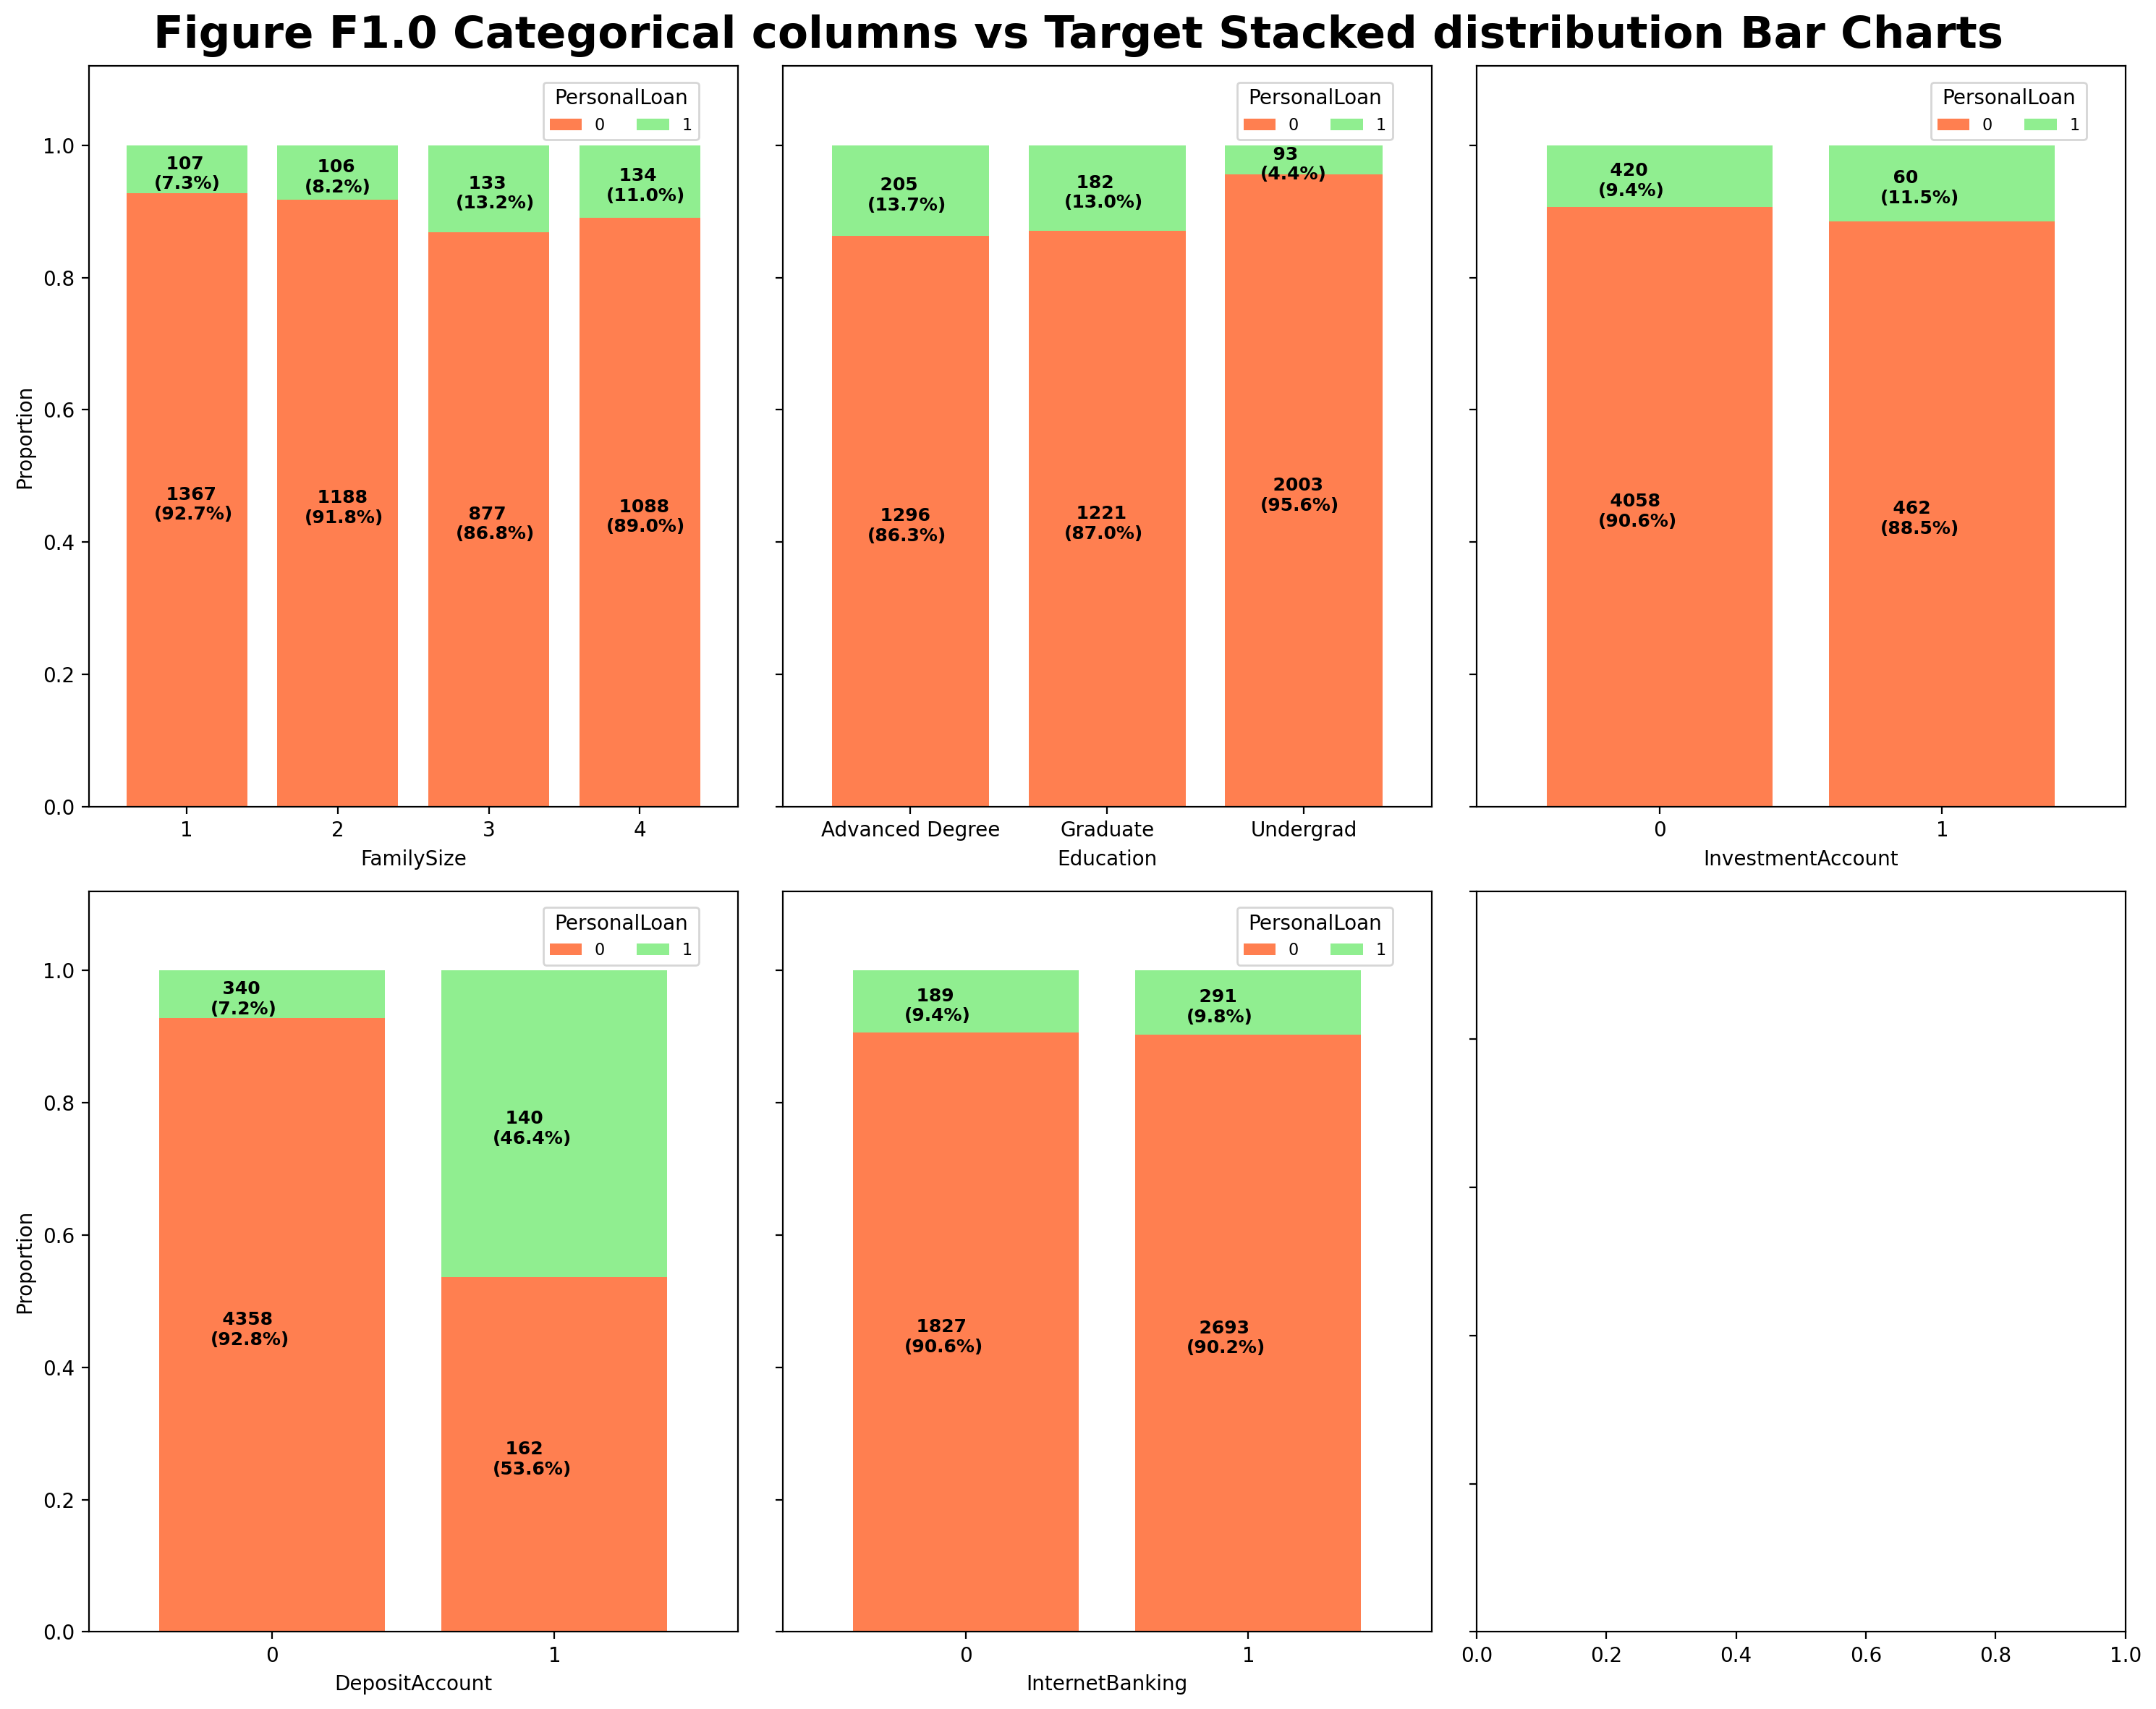

In [24]:
Categorical_cols = ['FamilySize', 'Education', 'InvestmentAccount', 'DepositAccount', 'InternetBanking']
Target = 'PersonalLoan'
df = personal_loan_data

colorList = ['coral', 'lightgreen']
suptitle_name = "Figure F1.0 Categorical columns vs Target Stacked distribution Bar Charts"

bank.stacked_bar_proportion_plot(df, Categorical_cols, Target, colorList, suptitle_name)





**Box Plot for all the relevant required columns**




********************************==========================================********************************



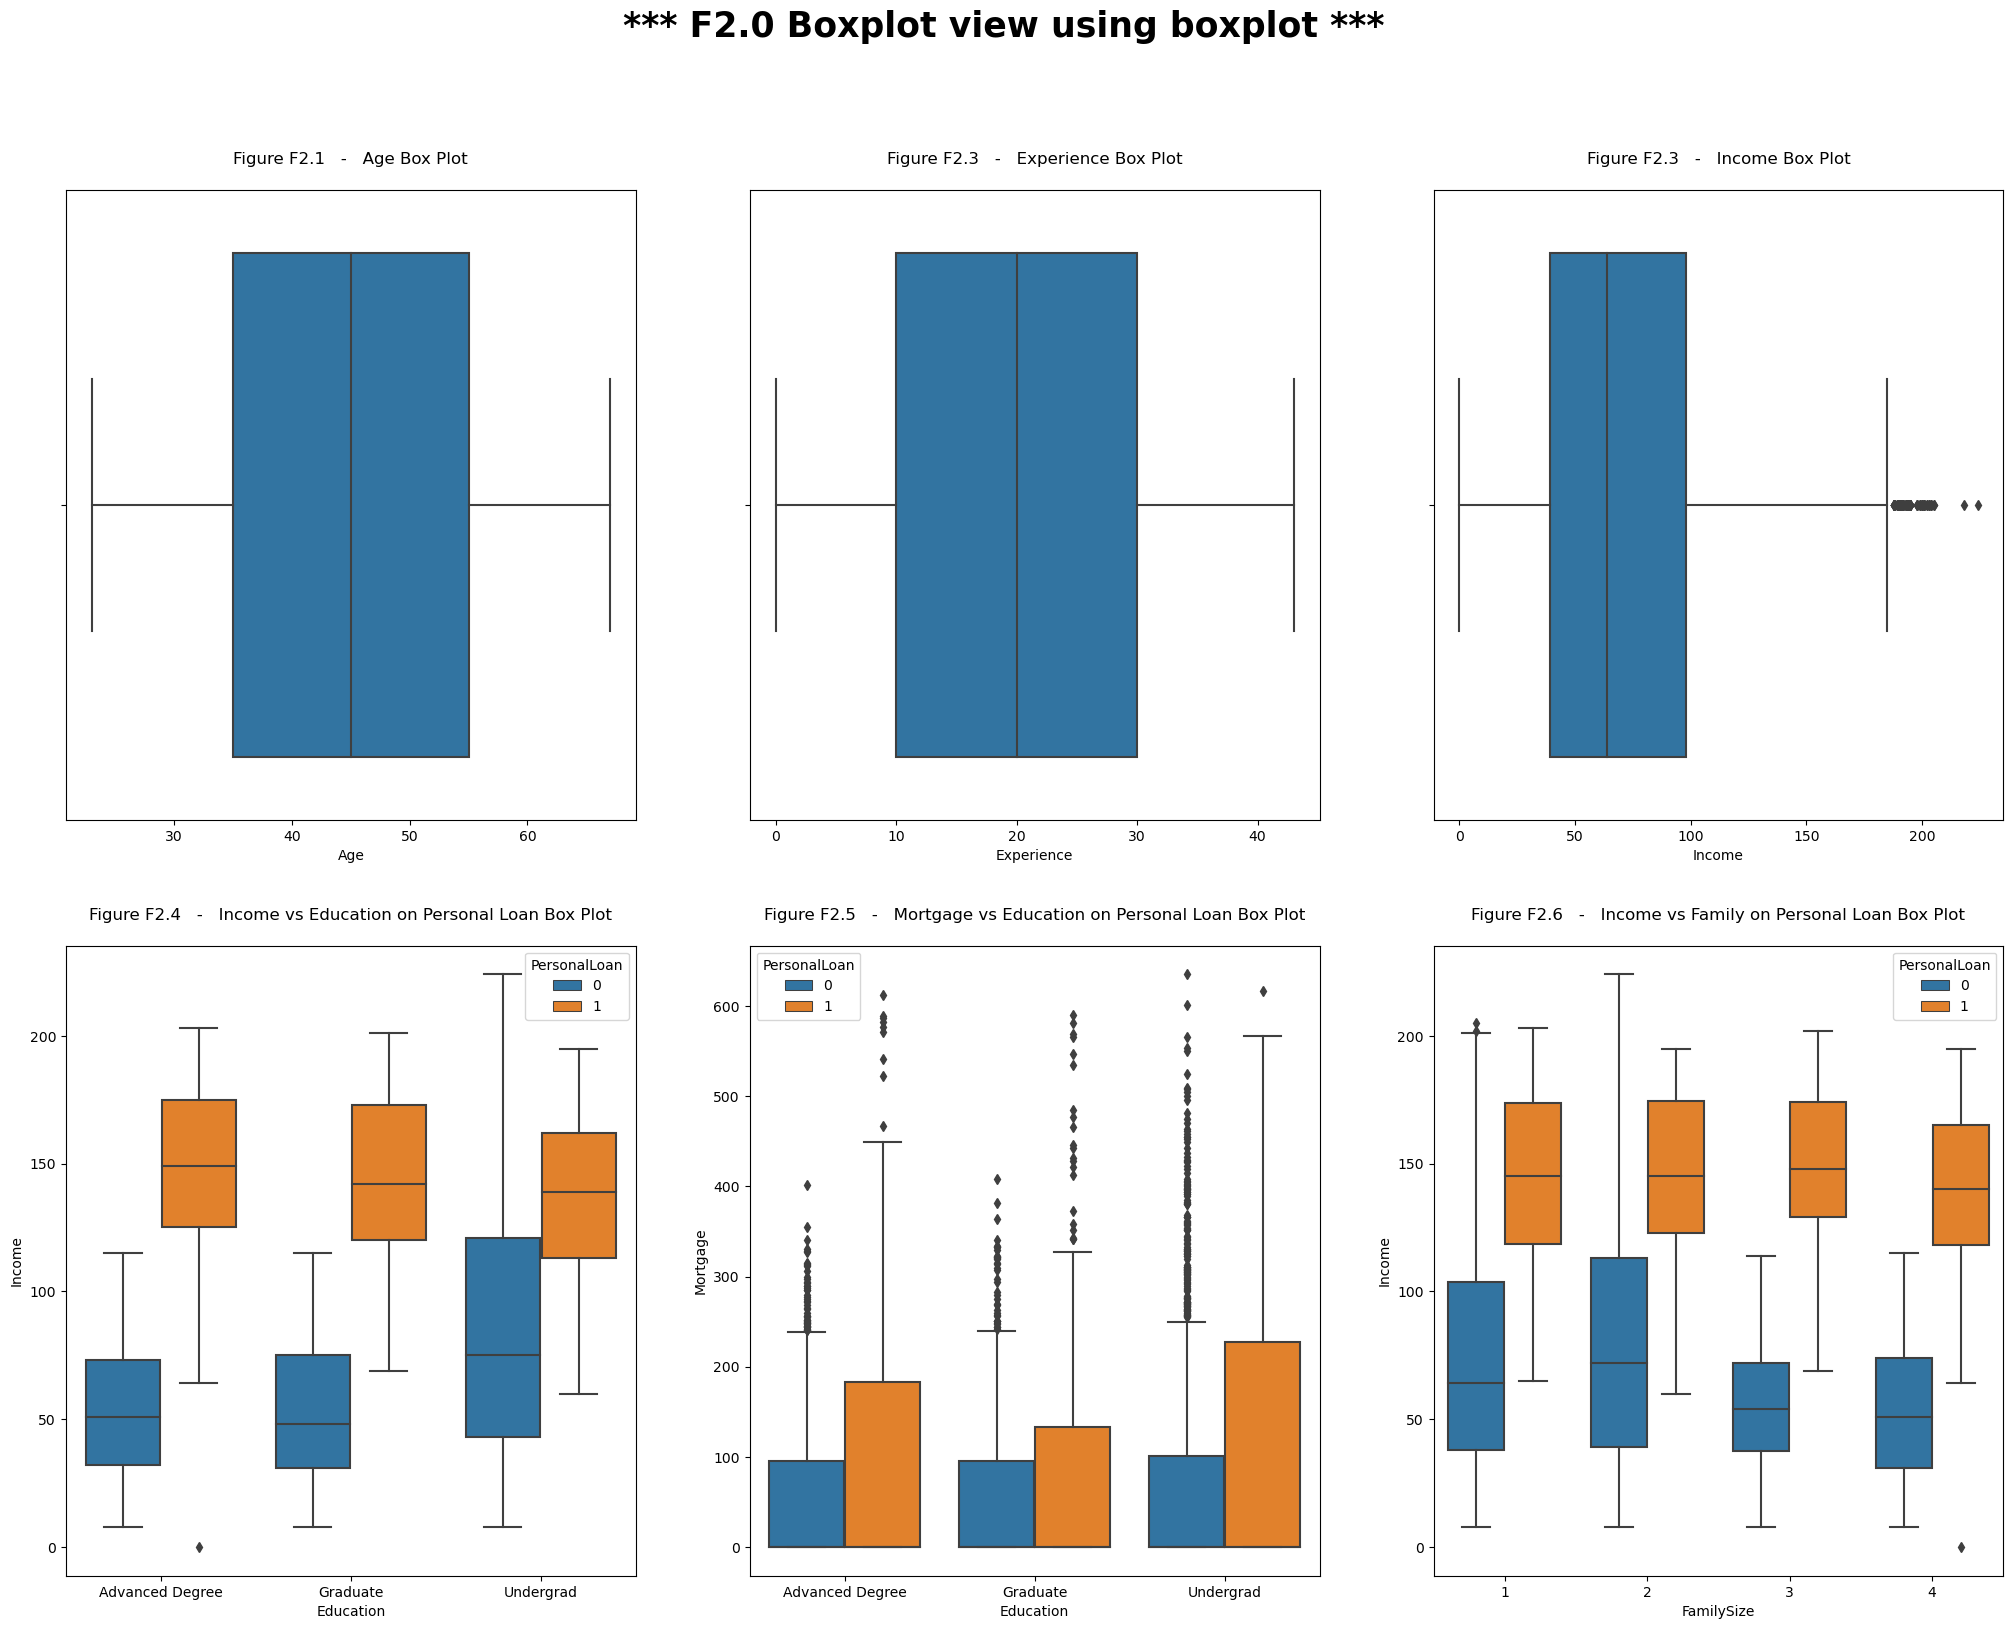




********************************==========================================********************************



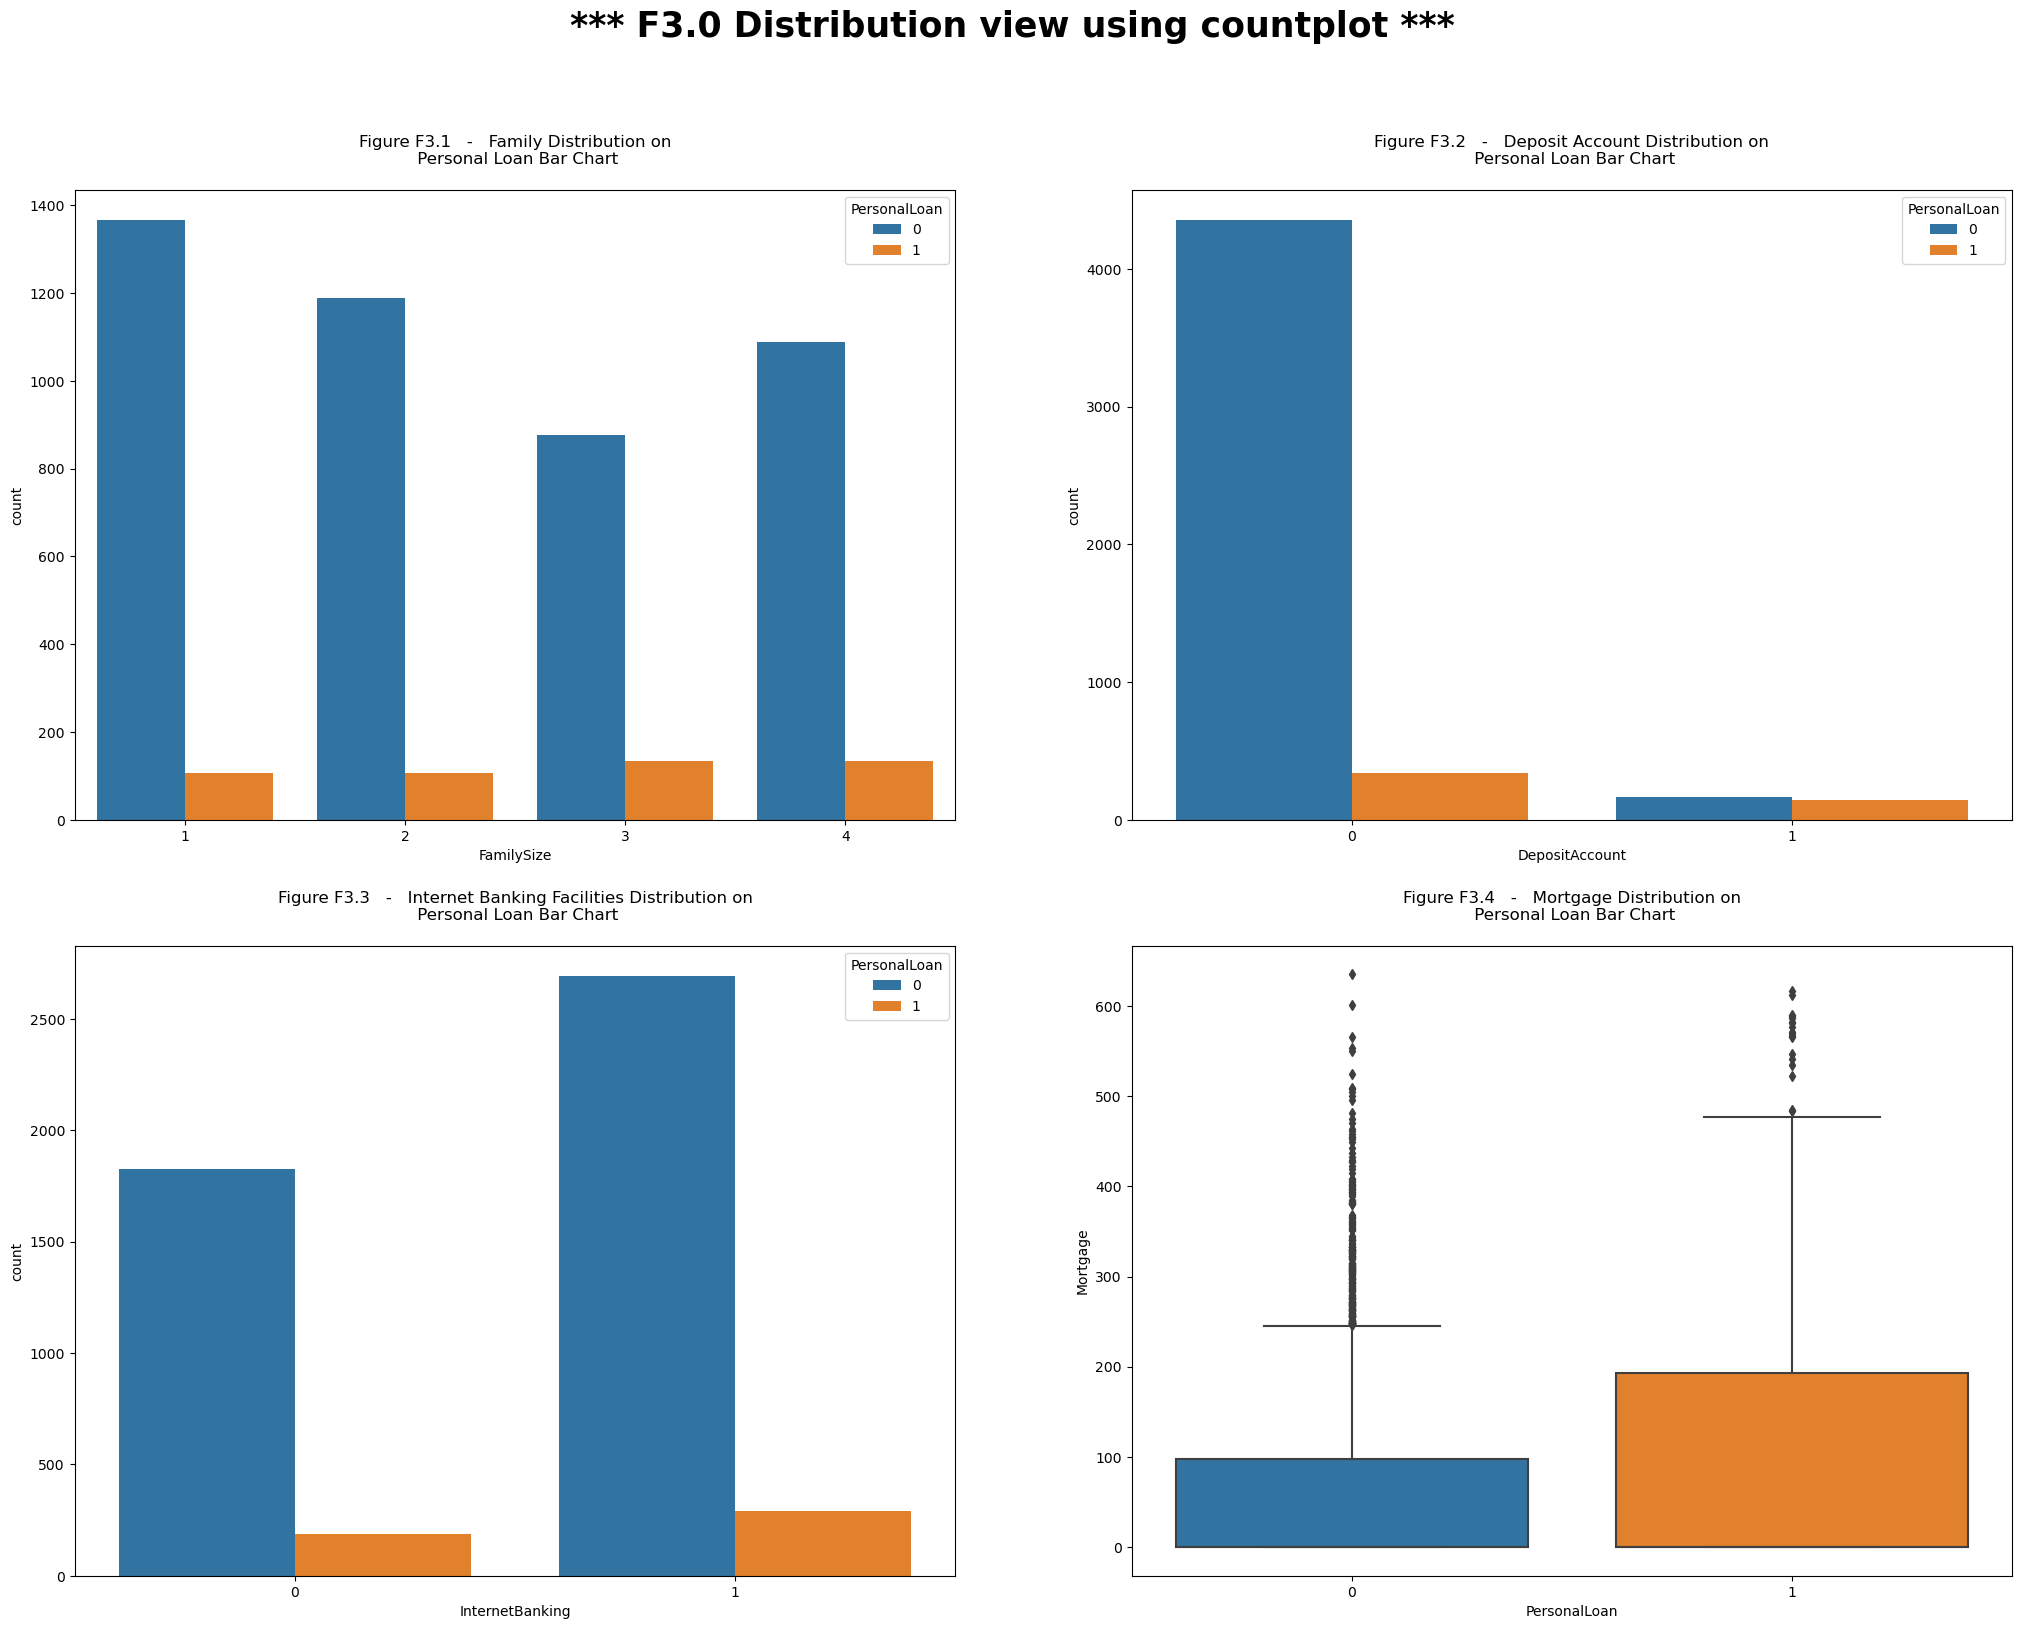




********************************==========================================********************************



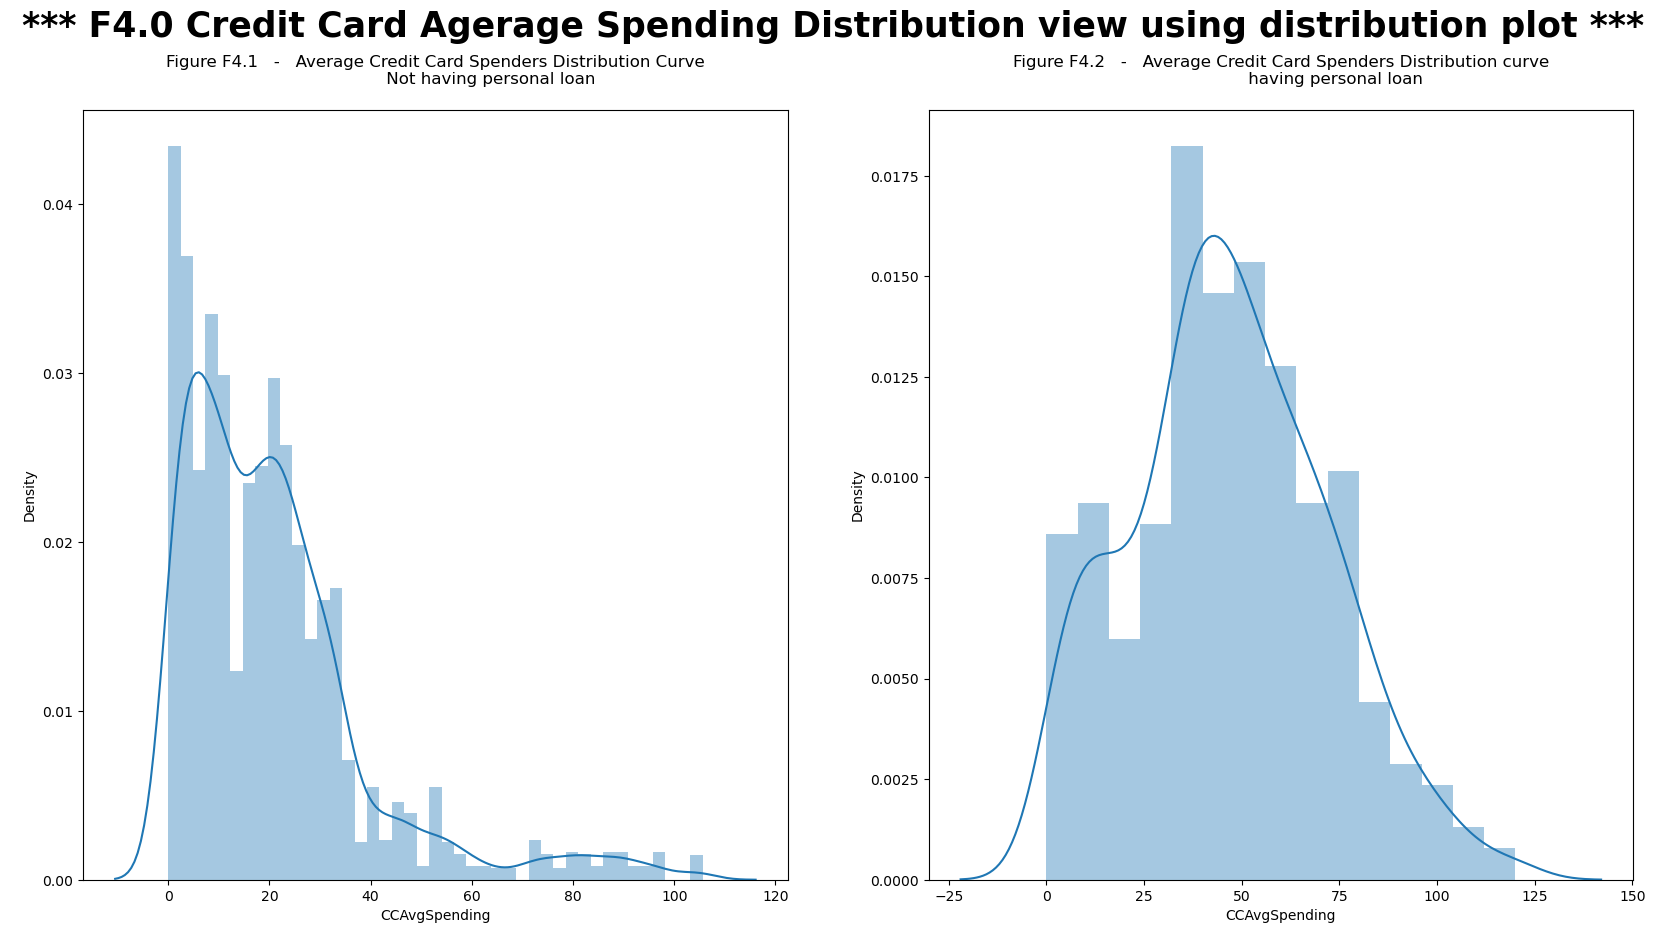

In [25]:
Categorical_cols = ['FamilySize', 'Education', 'InvestmentAccount', 'DepositAccount', 'InternetBanking']

print("\n\n\n********************************==========================================********************************\n")
fig, axes = plt.subplots(2, 3, figsize=(25, 18))
fig.suptitle(' *** F2.0 Boxplot view using boxplot *** ', color = "black", fontsize=25, fontweight="bold")

sns.boxplot(x=personal_loan_data["Age"], ax=axes[0, 0]).set(title='Figure F2.1   -   Age Box Plot\n')
sns.boxplot(x=personal_loan_data["Experience"], ax=axes[0, 1]).set(title='Figure F2.3   -   Experience Box Plot\n')
sns.boxplot(x=personal_loan_data["Income"], ax=axes[0, 2]).set(title='Figure F2.3   -   Income Box Plot\n')
sns.boxplot(x='Education',y='Income',hue = Target,data=personal_loan_data, ax=axes[1, 0]).set(title='Figure F2.4   -   Income vs Education on Personal Loan Box Plot\n')
sns.boxplot(x="Education", y='Mortgage', hue = Target, data=personal_loan_data, ax=axes[1, 1]).set(title='Figure F2.5   -   Mortgage vs Education on Personal Loan Box Plot\n')
sns.boxplot(x="FamilySize",y="Income",hue = Target,data=personal_loan_data, ax=axes[1, 2]).set(title='Figure F2.6   -   Income vs Family on Personal Loan Box Plot\n')
plt.show()

print("\n\n\n********************************==========================================********************************\n")
fig, axes = plt.subplots(2, 2, figsize=(25, 18))
fig.suptitle(' *** F3.0 Distribution view using countplot *** ', color = "black", fontsize=25, fontweight="bold")

sns.countplot(x='FamilySize', hue=Target, data=personal_loan_data, ax=axes[0, 0]).set(title='Figure F3.1   -   Family Distribution on\n Personal Loan Bar Chart\n')
#plt.show()
sns.countplot(x='DepositAccount',hue=Target, data = personal_loan_data, ax=axes[0, 1]).set(title='Figure F3.2   -   Deposit Account Distribution on\n Personal Loan Bar Chart\n')
#plt.show()
sns.countplot(x='InternetBanking',hue=Target, data = personal_loan_data, ax=axes[1, 0]).set(title='Figure F3.3   -   Internet Banking Facilities Distribution on\n Personal Loan Bar Chart\n')
#plt.show()
sns.boxplot(y='Mortgage',x=Target, data = personal_loan_data, ax=axes[1, 1]).set(title='Figure F3.4   -   Mortgage Distribution on\n Personal Loan Bar Chart\n')
plt.show()

print("\n\n\n********************************==========================================********************************\n")
fig, axes = plt.subplots(1, 2, figsize=(20, 10))
fig.suptitle(' *** F4.0 Credit Card Agerage Spending Distribution view using distribution plot *** ', color = "black", fontsize=25, fontweight="bold")

sns.distplot(personal_loan_data[personal_loan_data[Target] == 0]['CCAvgSpending']*12, ax=axes[0]).set(title='Figure F4.1   -   Average Credit Card Spenders Distribution Curve\n                     Not having personal loan\n')
sns.distplot(personal_loan_data[personal_loan_data[Target] == 1]['CCAvgSpending']*12, ax=axes[1]).set(title='Figure F4.2   -   Average Credit Card Spenders Distribution curve\n                     having personal loan\n')
plt.show()

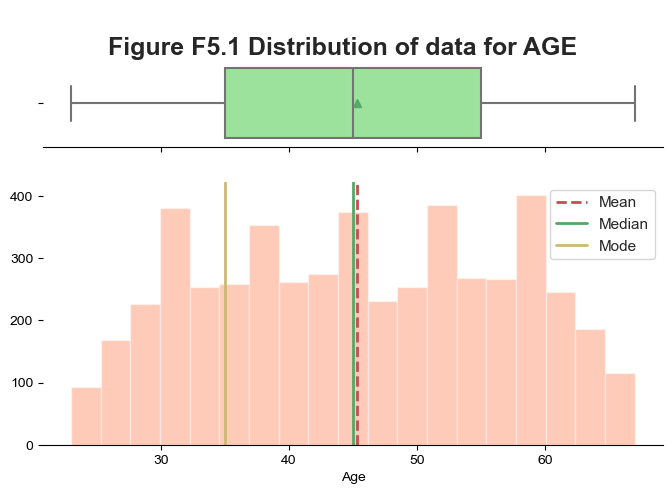

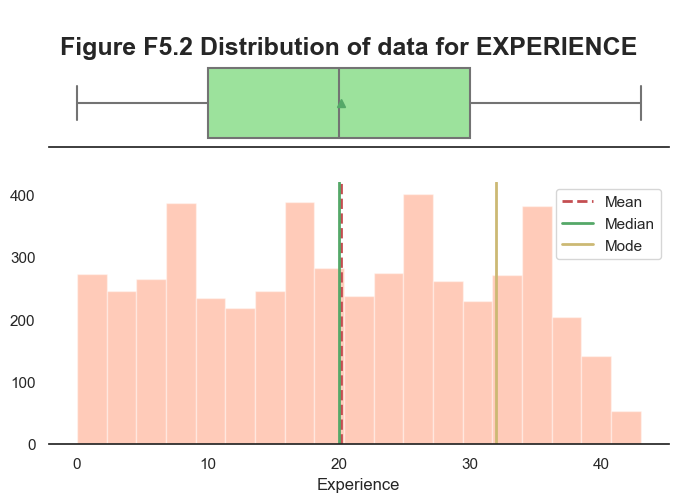

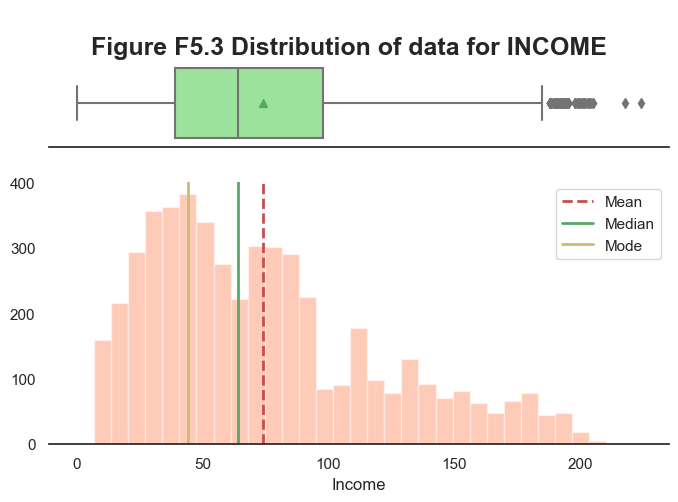

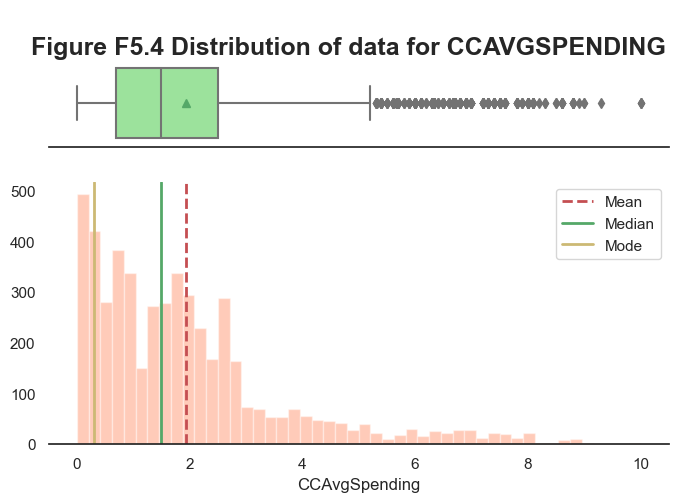

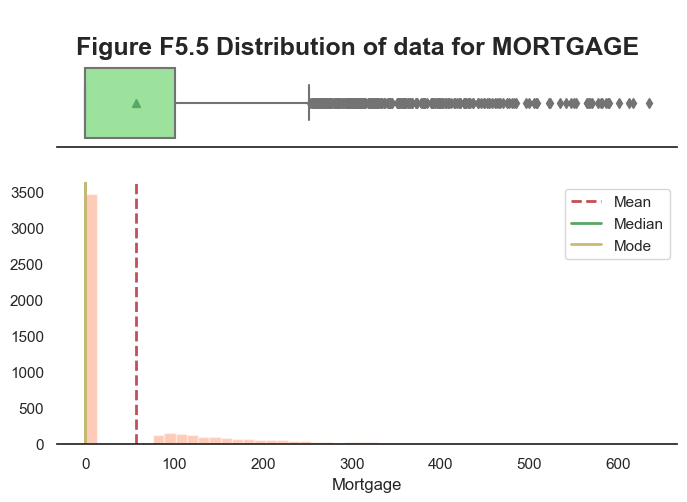

In [26]:
numerical_column_list = ['Age','Experience','Income','CCAvgSpending','Mortgage', ]
df = personal_loan_data
colorList = ['lightgreen', 'coral']

for idx, col_name in enumerate(numerical_column_list):
    bank.box_and_distribution_plot(df[col_name], colorList, str(idx+1))
    


# Scatter Plot View

Text(0.5, 1.0, 'Figure F6.0   -   Distribution of Education by Age and Experience\n')

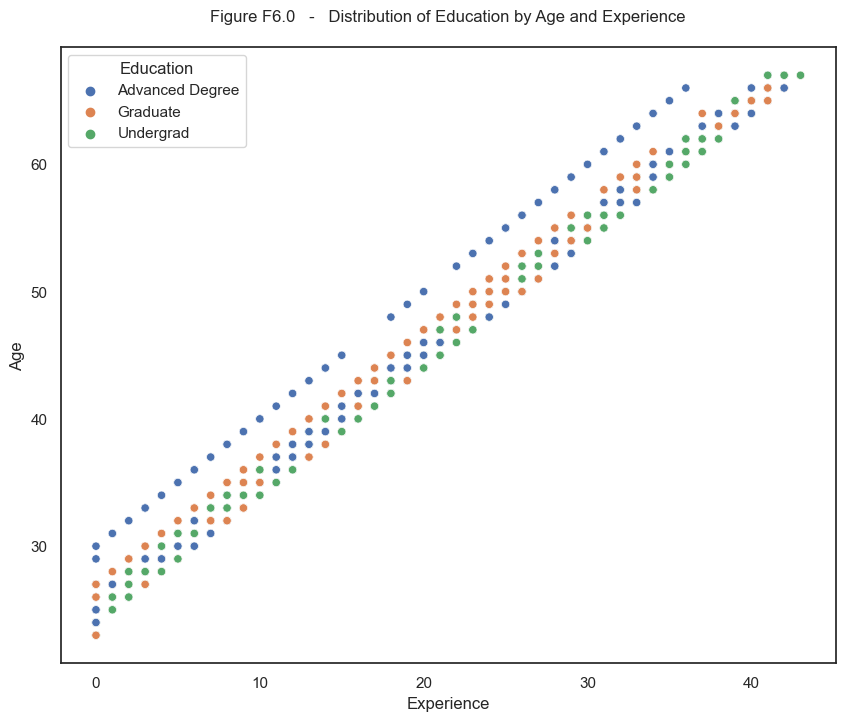

In [27]:
plt.figure(figsize = (10,8))
sns.scatterplot(x = "Experience", y = "Age", hue = "Education", data = personal_loan_data)
plt.xlabel("Experience")
plt.ylabel("Age")
plt.title("Figure F6.0   -   Distribution of Education by Age and Experience\n")

Experience and Age gives a positive correlation ,as Experience increases Age also increases.

linkcode
We can see with the help of colors of education level that more people are in the under graduate level.

**Distribution View of Credit Card Average Spending vs Personal Loan**

*We can observed from the above that there are good amount of customer with higher CCAvg Spending with Personal Loan.*

In [28]:
print("Credit card spending of Non-Loan customers with meadin value - ", personal_loan_data[personal_loan_data[Target] == 0]['CCAvgSpending'].median()*1000)
print("Credit card spending of Loan customers with meadin value - ", personal_loan_data[personal_loan_data[Target] == 1]['CCAvgSpending'].median()*1000)


Credit card spending of Non-Loan customers with meadin value -  1400.0
Credit card spending of Loan customers with meadin value -  3800.0


*The customers who are spending average credit card with a median of 3800 dollar gives a higher probability of Personal loan,whereas the customers who are spending Lower credit card with a median of 1400 dollars are less likely to take a loan.*

# Correlation Check in columns

In [29]:
correlation_check =personal_loan_data.corr()
correlation_check

ID       Age  Experience    Income  PostalCode  \
ID                 1.000000 -0.008473   -0.008103 -0.016795    0.013432   
Age               -0.008473  1.000000    0.994230 -0.054421   -0.029216   
Experience        -0.008103  0.994230    1.000000 -0.045785   -0.028607   
Income            -0.016795 -0.054421   -0.045785  1.000000   -0.016933   
PostalCode         0.013432 -0.029216   -0.028607 -0.016933    1.000000   
CCAvgSpending     -0.024675 -0.052012   -0.049998  0.644034   -0.004061   
Mortgage          -0.013920 -0.012539   -0.010937  0.207358    0.007383   
InvestmentAccount -0.016972 -0.000436   -0.001174 -0.002813    0.004704   
DepositAccount    -0.006909  0.008043    0.009963  0.169662    0.019972   
InternetBanking   -0.002528  0.013702    0.013736  0.015171    0.016990   
PersonalLoan      -0.024801 -0.007726   -0.007977  0.500461    0.000107   

                   CCAvgSpending  Mortgage  InvestmentAccount  DepositAccount  \
ID                     -0.024675 -0.013920          -0.016972       -0.006909   
Age                    -0.052012 -0.012539          -0.000436        0.008043   
Experience             -0.049998 -0.010937          -0.001174        0.009963   
Income                  0.644034  0.207358          -0.002813        0.169662   
PostalCode             -0.004061  0.007383           0.004704        0.019972   
CCAvgSpending           1.000000  0.109905           0.015086        0.136534   
Mortgage                0.109905  1.000000          -0.005411        0.089311   
InvestmentAccount       0.015086 -0.005411           1.000000        0.317034   
DepositAccount          0.136534  0.089311           0.317034        1.000000   
InternetBanking        -0.003611 -0.005995           0.012627        0.175880   
PersonalLoan            0.366889  0.142095           0.021954        0.316355   

                   InternetBanking  PersonalLoan  
ID                       -0.002528     -0.024801  
Age                       0.013702     -0.007726  
Experience                0.013736     -0.007977  
Income                    0.015171      0.500461  
PostalCode                0.016990      0.000107  
CCAvgSpending            -0.003611      0.366889  
Mortgage                 -0.005995      0.142095  
InvestmentAccount         0.012627      0.021954  
DepositAccount            0.175880      0.316355  
InternetBanking           1.000000      0.006278  
PersonalLoan              0.006278      1.000000

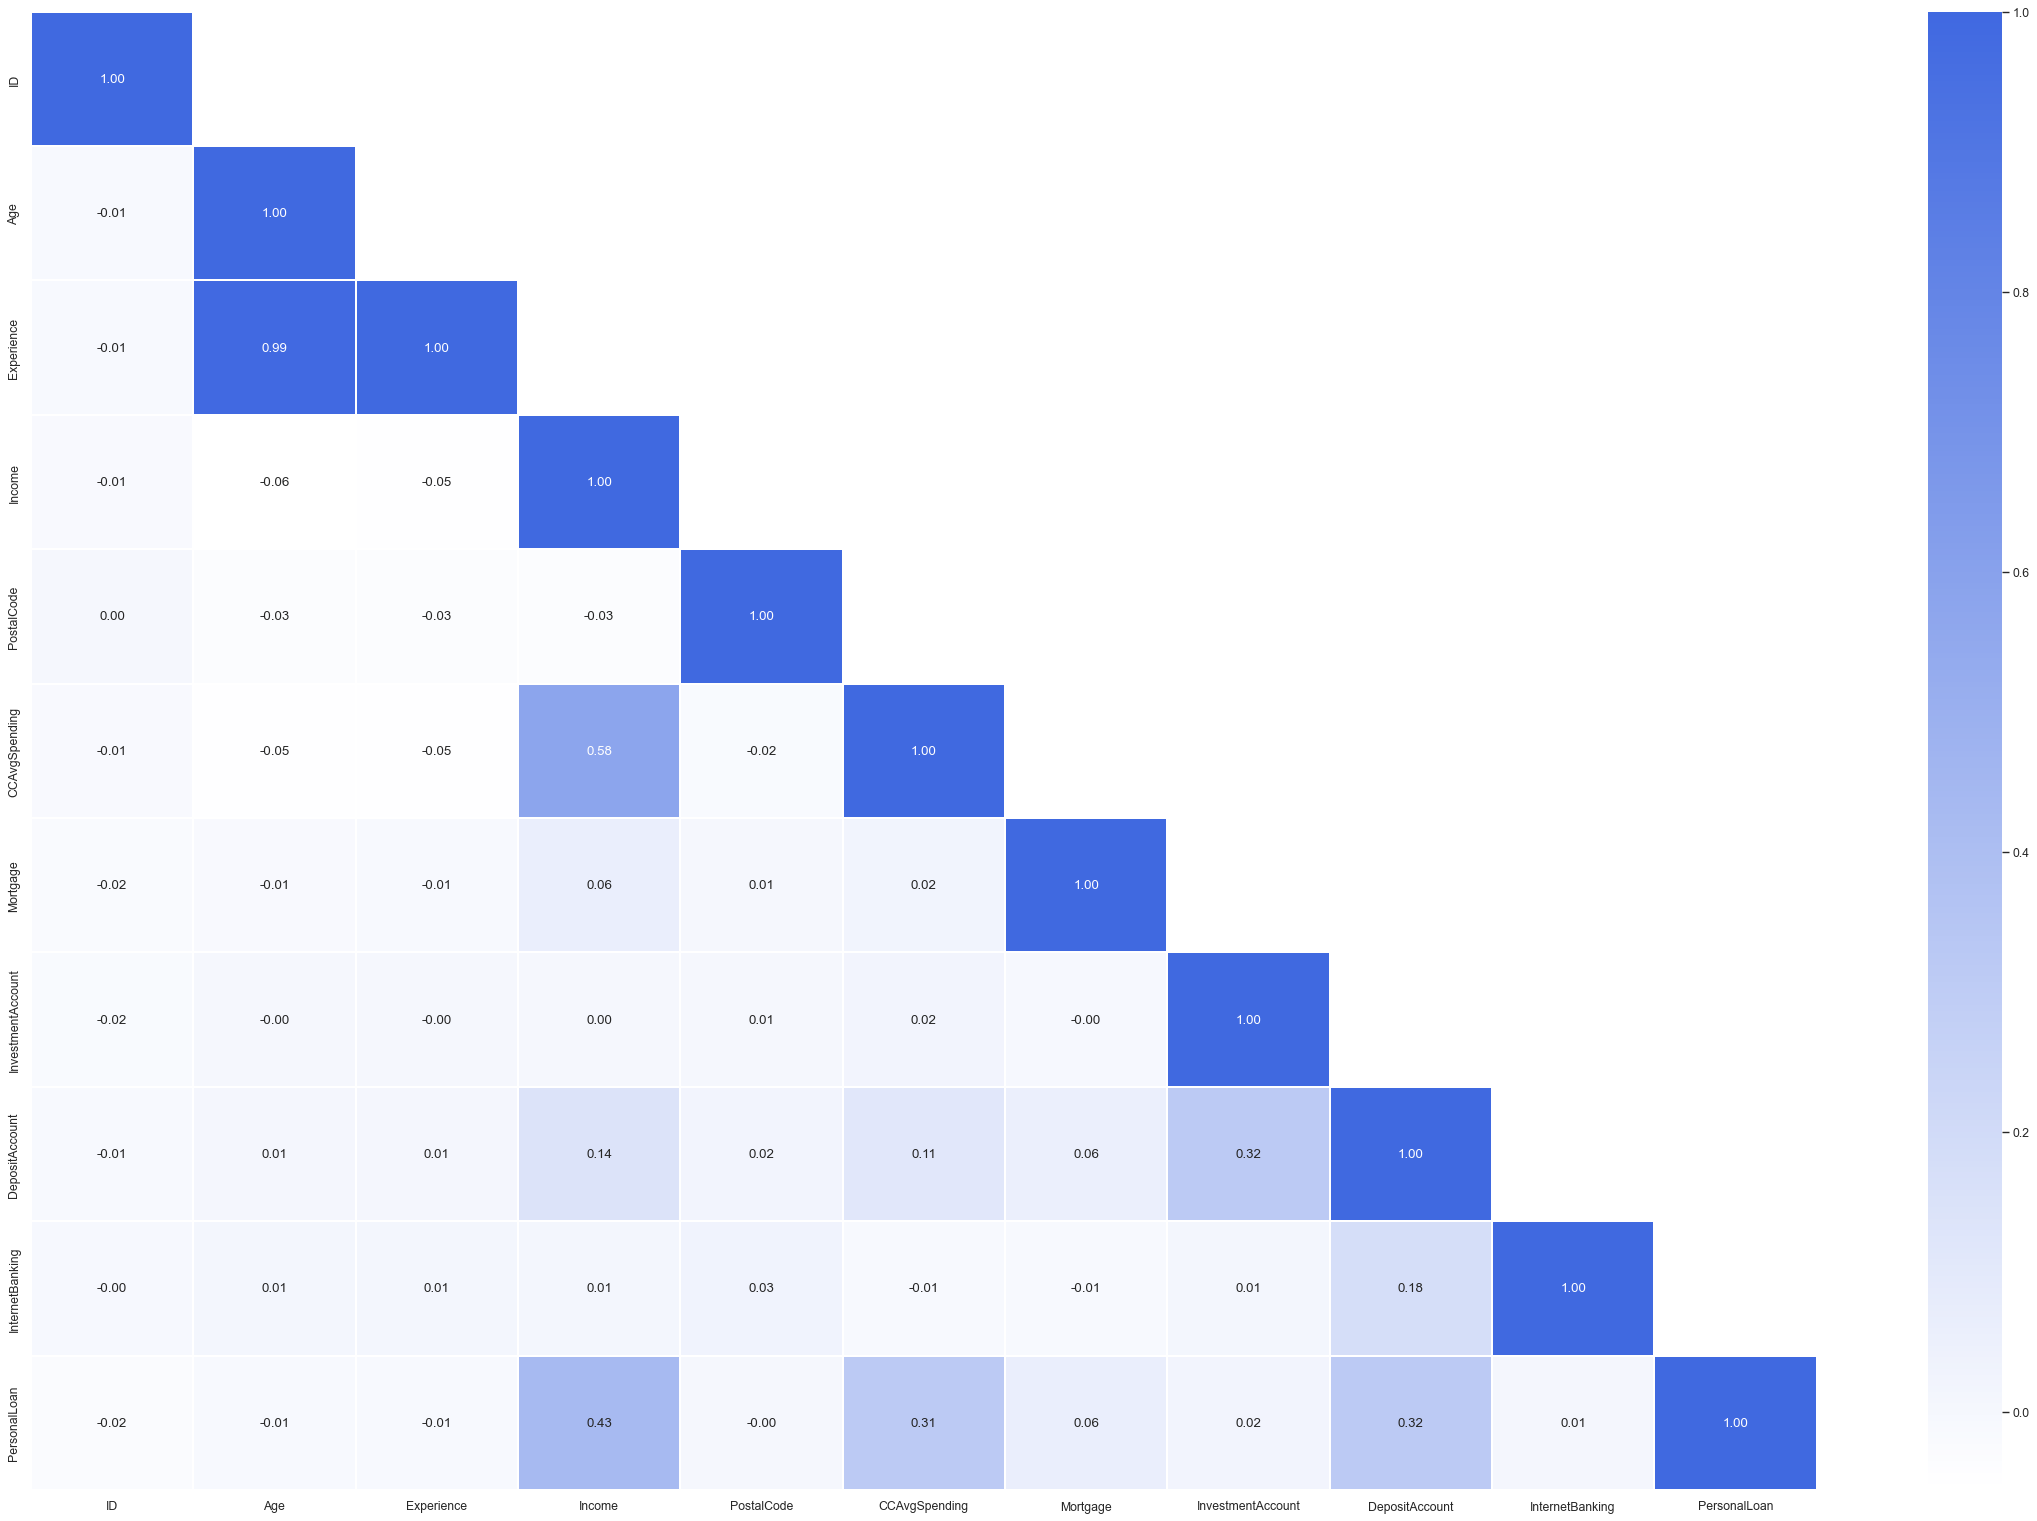

In [30]:
# Define a colormap
# reference - https://matplotlib.org/3.0.2/gallery/color/custom_cmap.html
royalblue = LinearSegmentedColormap.from_list('royalblue', [(0, (1,1,1)), (1, (0.25,0.41,0.88))])

target = 'PersonalLoan'
df = personal_loan_data


bank.spearman_correlation(df, target, royalblue)

<br><br><br>



* ***https://www.calbhbc.org/region-map-and-listing.html*** : Using this link to convert the city to regions


In [31]:
PostalCode_mapped.update({92717:'Orange County'})
PostalCode_mapped.update({92634:'Orange County'}) 

personal_loan_data['CityName']=personal_loan_data['PostalCode'].map(PostalCode_mapped)
print("\n\n\nTo see the first 6 records of newly added column - ", personal_loan_data.head())

print("\n\n\nTotal Unique city name - ", personal_loan_data['CityName'].unique())

city_mapping = {
'Los Angeles County':'Los Angeles Region',
'San Diego County':'Southern',
'Santa Clara County':'Bay Area',
'Alameda County':'Bay Area',
'Orange County':'Southern',
'San Francisco County':'Bay Area',
'San Mateo County':'Bay Area',
'Sacramento County':'Central',
'Santa Barbara County':'Southern',
'Yolo County':'Central',
'Monterey County':'Bay Area',            
'Ventura County':'Southern',             
'San Bernardino County':'Southern',       
'Contra Costa County':'Bay Area',        
'Santa Cruz County':'Bay Area',           
'Riverside County':'Southern',            
'Kern County':'Southern',                 
'Marin County':'Bay Area',                
'San Luis Obispo County':'Southern',     
'Solano County':'Bay Area',              
'Humboldt County':'Superior',            
'Sonoma County':'Bay Area',                
'Fresno County':'Central',               
'Placer County':'Central',                
'Butte County':'Superior',               
'Shasta County':'Superior',                
'El Dorado County':'Central',             
'Stanislaus County':'Central',            
'San Benito County':'Bay Area',          
'San Joaquin County':'Central',           
'Mendocino County':'Superior',             
'Tuolumne County':'Central',                
'Siskiyou County':'Superior',              
'Trinity County':'Superior',                
'Merced County':'Central',                  
'Lake County':'Superior',                 
'Napa County':'Bay Area',                   
'Imperial County':'Southern',
93077:'Other',
96651:'Other',
 9307:'Other',
92634:'Other',
92717:'Other'
}

personal_loan_data['Regions'] = personal_loan_data['CityName'].map(city_mapping)
personal_loan_data['Regions'].unique()





To see the first 6 records of newly added column -     ID  Age  Experience  Income  PostalCode FamilySize  CCAvgSpending  \
0   1   25           1    49.0       91107          4            1.6   
1   2   45          19    34.0       90089          3            1.5   
2   3   39          15    11.0       94720          1            1.0   
3   4   35           9    61.0       94112          1            2.7   
4   5   35           8    45.0       91330          4            1.0   

   Education  Mortgage  InvestmentAccount  DepositAccount  InternetBanking  \
0  Undergrad         0                  1               0                0   
1  Undergrad         0                  1               0                0   
2  Undergrad         0                  0               0                0   
3   Graduate         0                  0               0                0   
4   Graduate         0                  0               0                0   

   PersonalLoan              CityName  
0  

array(['Los Angeles Region', 'Bay Area', 'Southern', 'Superior',
       'Central', 'Other'], dtype=object)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   ID                 5000 non-null   int64   
 1   Age                5000 non-null   int64   
 2   Experience         5000 non-null   int64   
 3   Income             5000 non-null   float64 
 4   PostalCode         5000 non-null   int64   
 5   FamilySize         5000 non-null   category
 6   CCAvgSpending      5000 non-null   float64 
 7   Education          5000 non-null   category
 8   Mortgage           5000 non-null   int64   
 9   InvestmentAccount  5000 non-null   int32   
 10  DepositAccount     5000 non-null   int32   
 11  InternetBanking    5000 non-null   int64   
 12  PersonalLoan       5000 non-null   int64   
 13  CityName           5000 non-null   object  
 14  Regions            5000 non-null   object  
dtypes: category(2), float64(2), int32(2), int64(7), object(

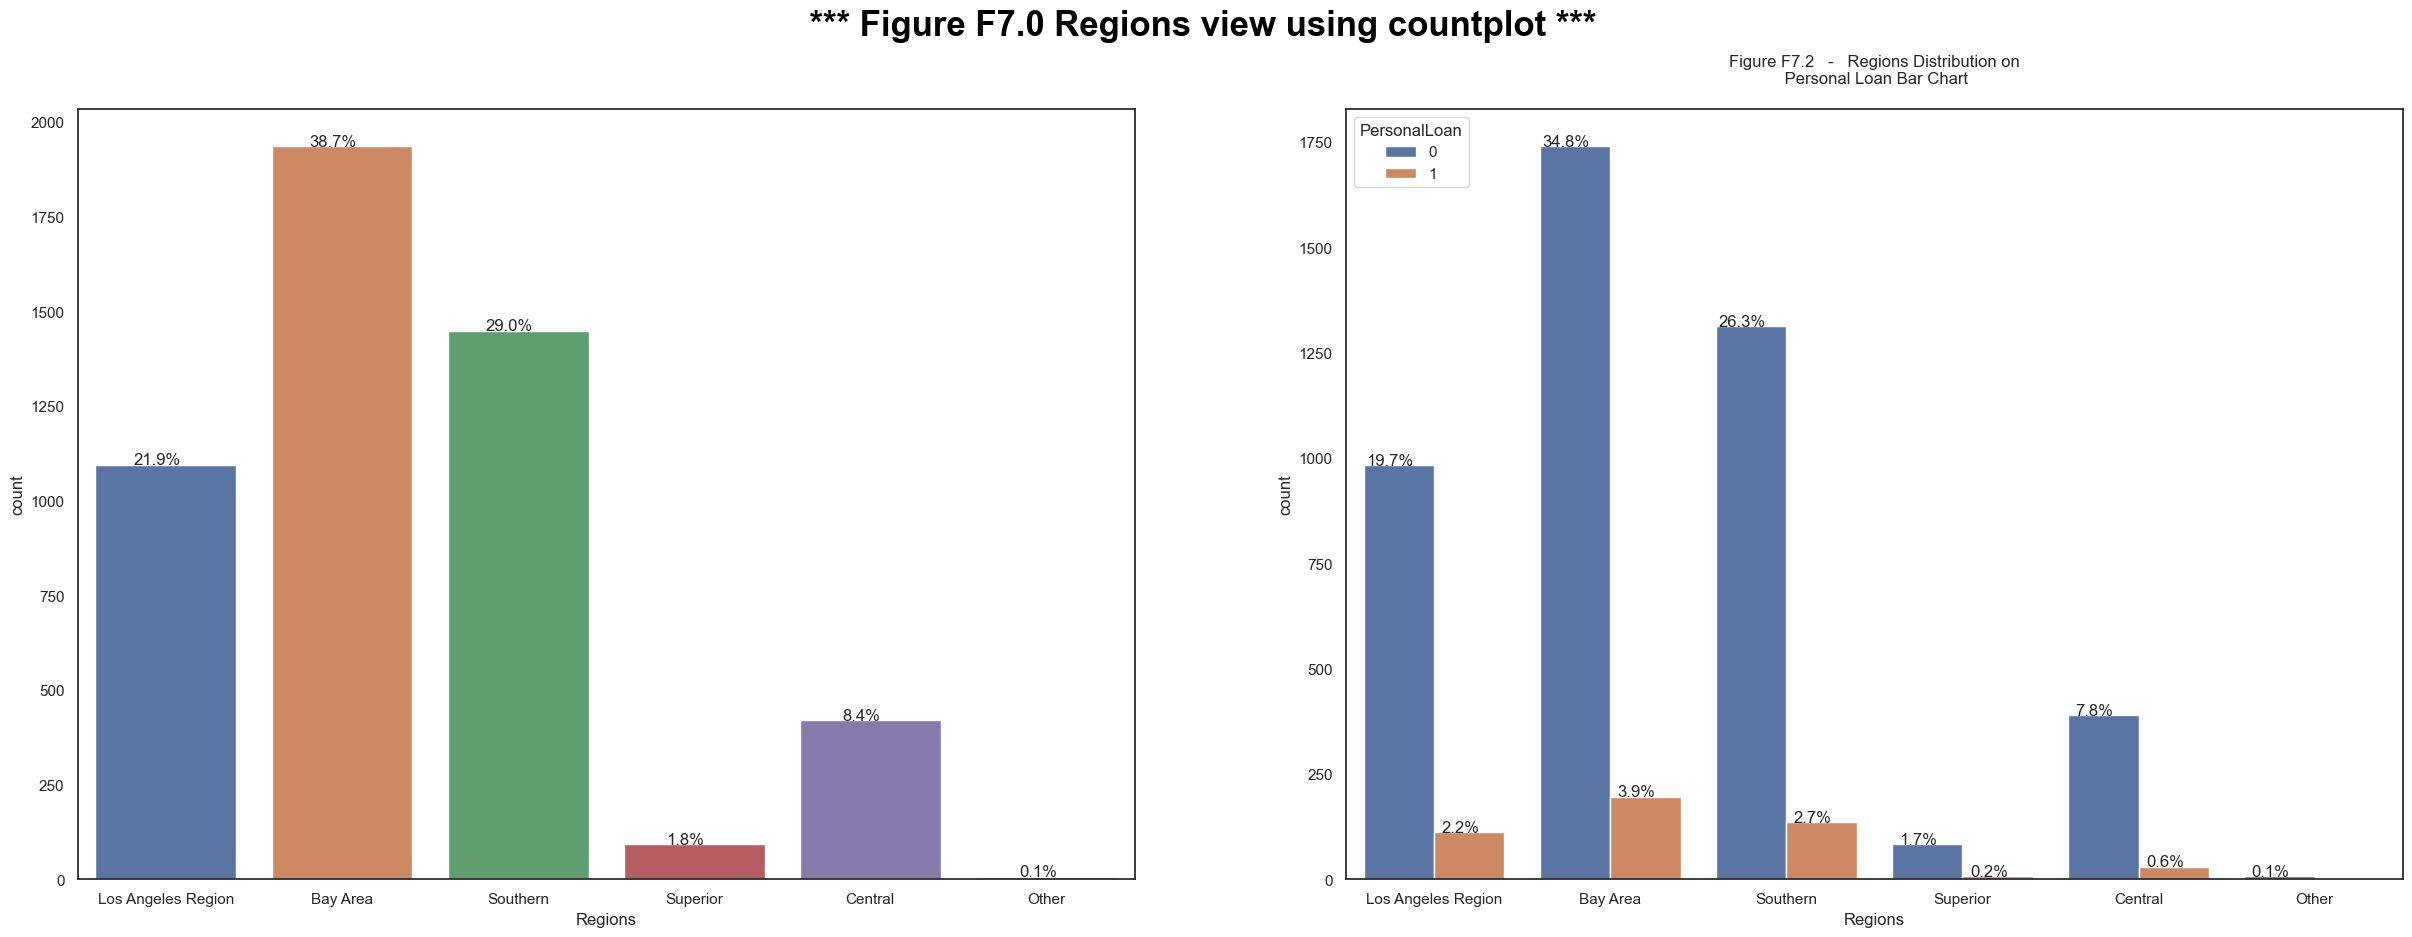

In [32]:
print("To see the dataframe info summary for null values \n", personal_loan_data.info())
print("\n\n\n********************************==========================================********************************")
#plt.figure(figsize=(9,7)) 

fig, axes = plt.subplots(1, 2, figsize=(30, 10))
fig.suptitle(' *** Figure F7.0 Regions view using countplot *** ', color = "black", fontsize=25, fontweight="bold")


plt1 = sns.countplot(data=personal_loan_data, x=personal_loan_data['Regions'], ax=axes[0])
for p in axes[0].patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/len(personal_loan_data['Regions']))
    x = p.get_x() + p.get_width() / 2 - 0.05
    y = p.get_height()
    plt1.annotate(percentage, (x, y),ha='center')

sns.countplot(x='Regions', hue=Target, data=personal_loan_data, ax=axes[1]).set(title='Figure F7.2   -   Regions Distribution on\n Personal Loan Bar Chart\n')
for p in axes[1].patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/len(personal_loan_data['Regions']))
    x = p.get_x() + p.get_width() / 2 - 0.05
    y = p.get_height()
    plt.annotate(percentage, (x, y),ha='center')

plt.show()


In [33]:
#personal_loan_data['Annual_CCAvgSpending'] = personal_loan_data['CCAvgSpending']*12
personal_loan_data.describe().T

count          mean          std     min       25%  \
ID                 5000.0   2500.500000  1443.520003     1.0   1250.75   
Age                5000.0     45.338400    11.463166    23.0     35.00   
Experience         5000.0     20.123600    11.433988     0.0     10.00   
Income             5000.0     73.795800    46.021974     0.0     39.00   
PostalCode         5000.0  93152.503000  2121.852197  9307.0  91911.00   
CCAvgSpending      5000.0      1.937938     1.747659     0.0      0.70   
Mortgage           5000.0     56.498800   101.713802     0.0      0.00   
InvestmentAccount  5000.0      0.104400     0.305809     0.0      0.00   
DepositAccount     5000.0      0.060400     0.238250     0.0      0.00   
InternetBanking    5000.0      0.596800     0.490589     0.0      0.00   
PersonalLoan       5000.0      0.096000     0.294621     0.0      0.00   

                       50%       75%      max  
ID                  2500.5   3750.25   5000.0  
Age                   45.0     55.00     67.0  
Experience            20.0     30.00     43.0  
Income                64.0     98.00    224.0  
PostalCode         93437.0  94608.00  96651.0  
CCAvgSpending          1.5      2.50     10.0  
Mortgage               0.0    101.00    635.0  
InvestmentAccount      0.0      0.00      1.0  
DepositAccount         0.0      0.00      1.0  
InternetBanking        1.0      1.00      1.0  
PersonalLoan           0.0      0.00      1.0

# Feature Eengineering below (deriving new columns)

1. Annual_CCAvgSpending - Created Annual CCAvgSpending by multiplying 12

1. Regions - Derived this through City name and using zipcodes library 

1. Age_Group, Annual_CCAvgSpending_Group, Income_Group - Created  using binning of 0%, 25%, 50%, 75%, max for EDA and visualization for better data understanding

In [34]:
personal_loan_data['Annual_CCAvgSpending'] = personal_loan_data['CCAvgSpending']*12

In [35]:
personal_loan_data["Annual_CCAvgSpending_Group"] = pd.cut( x = personal_loan_data["Annual_CCAvgSpending"], bins=[0.00, 8.40, 18.00, 30.00, 120.00],
                                                   labels=["Low", "Moderate", "High", "Very High"], include_lowest=True)
personal_loan_data["Income_Group"] = pd.cut( x= personal_loan_data["Income"], bins=[0, 39, 64, 98, 224], labels=["Lower", "Moderate", "High", "Very High"])

personal_loan_data['Age_Group'] = pd.cut(x = personal_loan_data['Age'], bins = [0, 35, 45, 55, 100], labels = ['0-35', '36-45', '46-55', '56-100'])




In [36]:
#personal_loan_data['Annual_CCAvgSpending'] = personal_loan_data['CCAvgSpending']*12
personal_loan_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 19 columns):
 #   Column                      Non-Null Count  Dtype   
---  ------                      --------------  -----   
 0   ID                          5000 non-null   int64   
 1   Age                         5000 non-null   int64   
 2   Experience                  5000 non-null   int64   
 3   Income                      5000 non-null   float64 
 4   PostalCode                  5000 non-null   int64   
 5   FamilySize                  5000 non-null   category
 6   CCAvgSpending               5000 non-null   float64 
 7   Education                   5000 non-null   category
 8   Mortgage                    5000 non-null   int64   
 9   InvestmentAccount           5000 non-null   int32   
 10  DepositAccount              5000 non-null   int32   
 11  InternetBanking             5000 non-null   int64   
 12  PersonalLoan                5000 non-null   int64   
 13  CityName          




********************************==========================================********************************


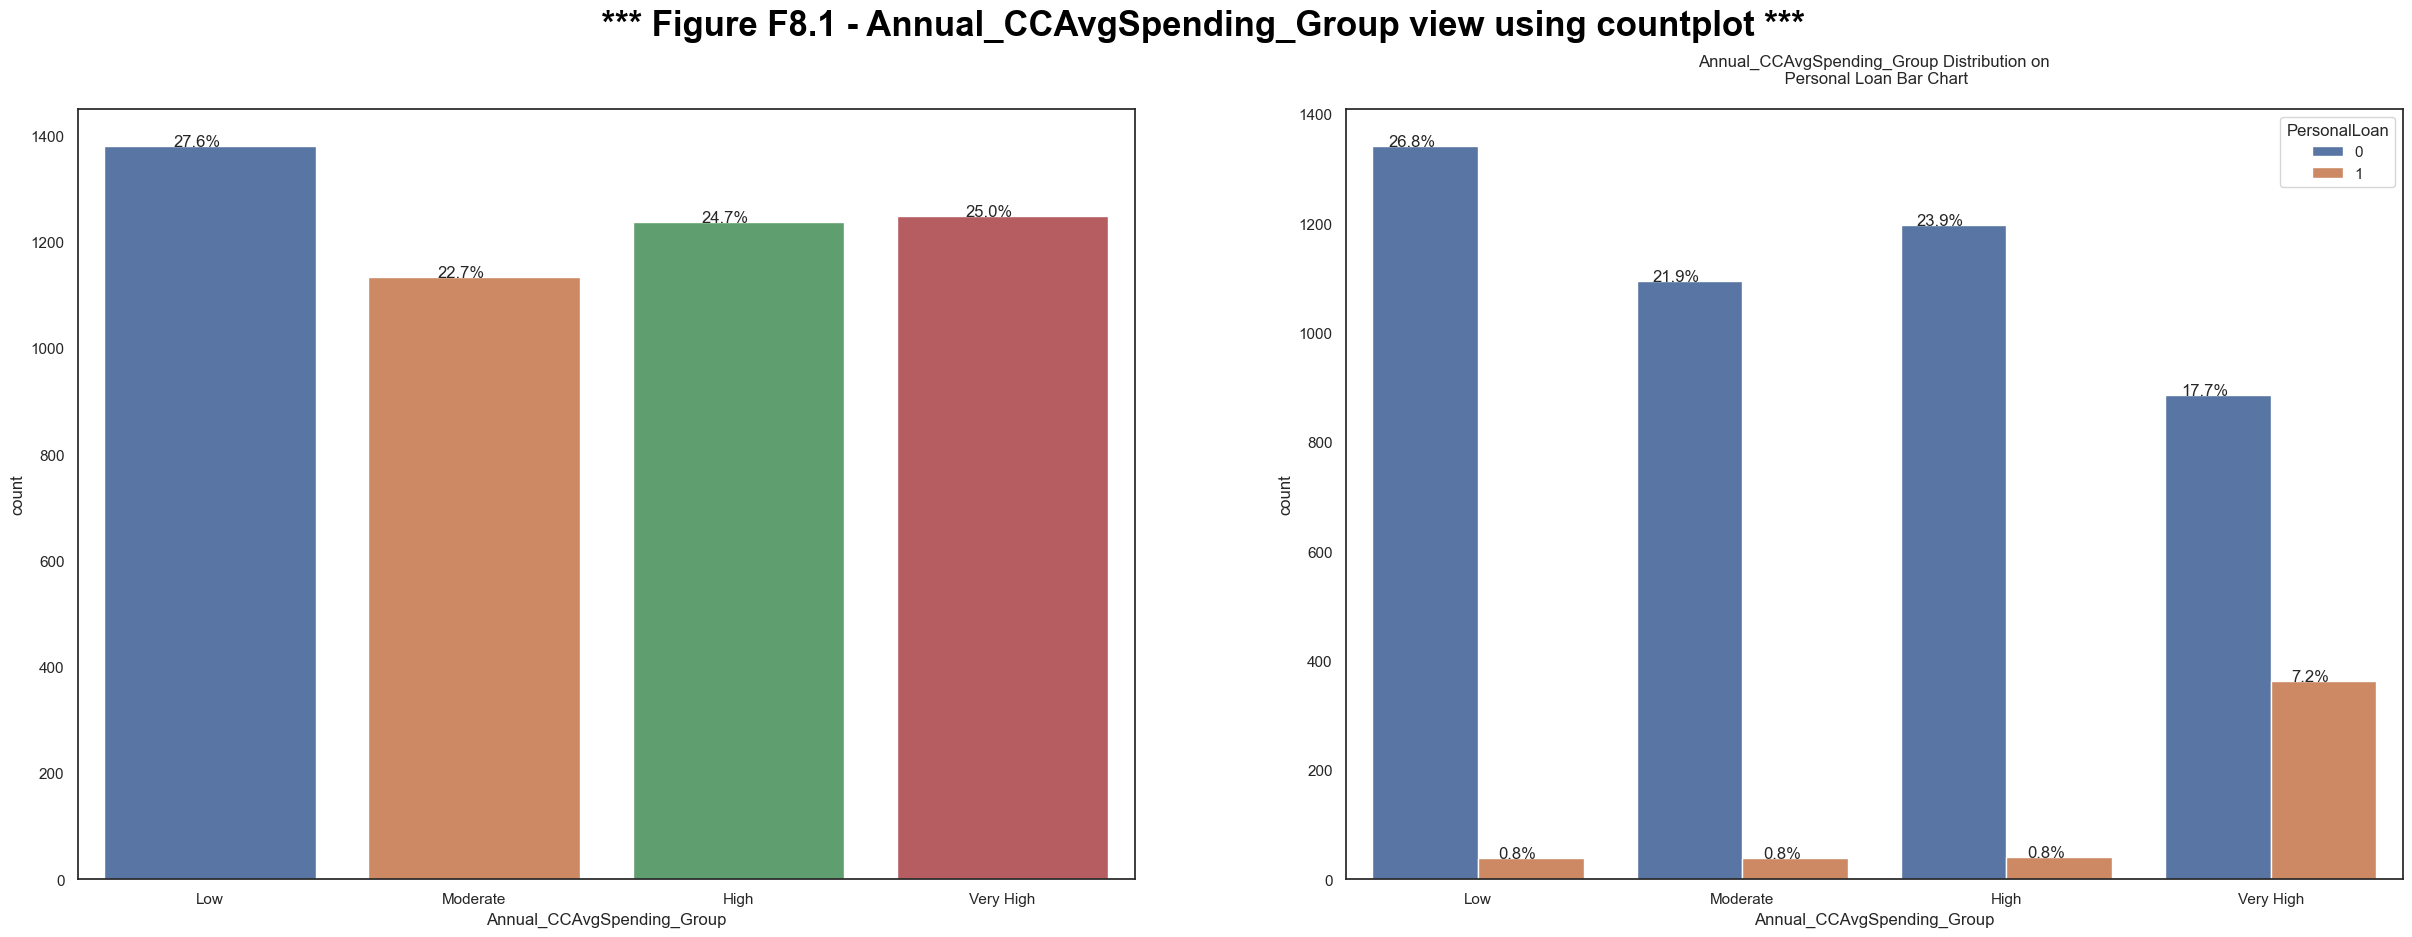




********************************==========================================********************************


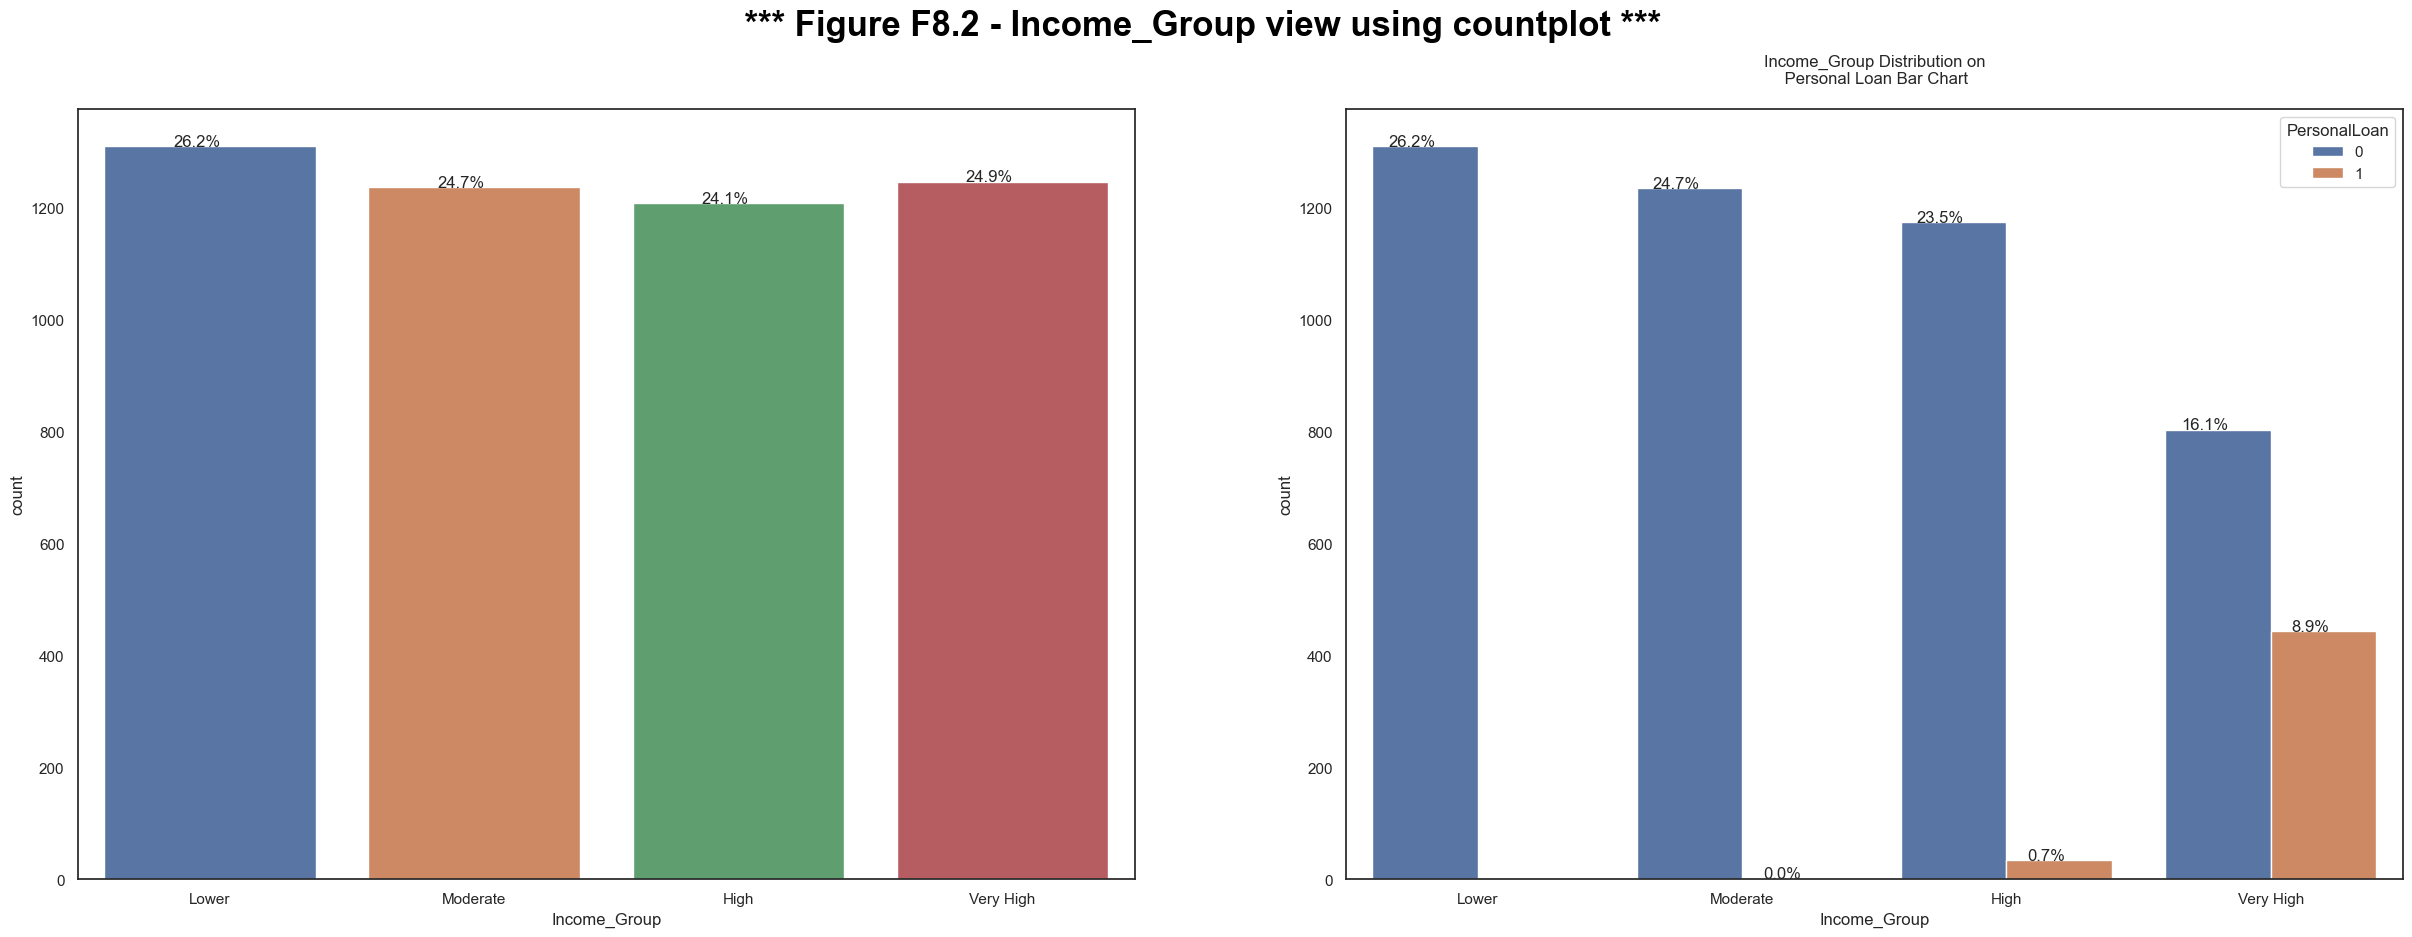




********************************==========================================********************************


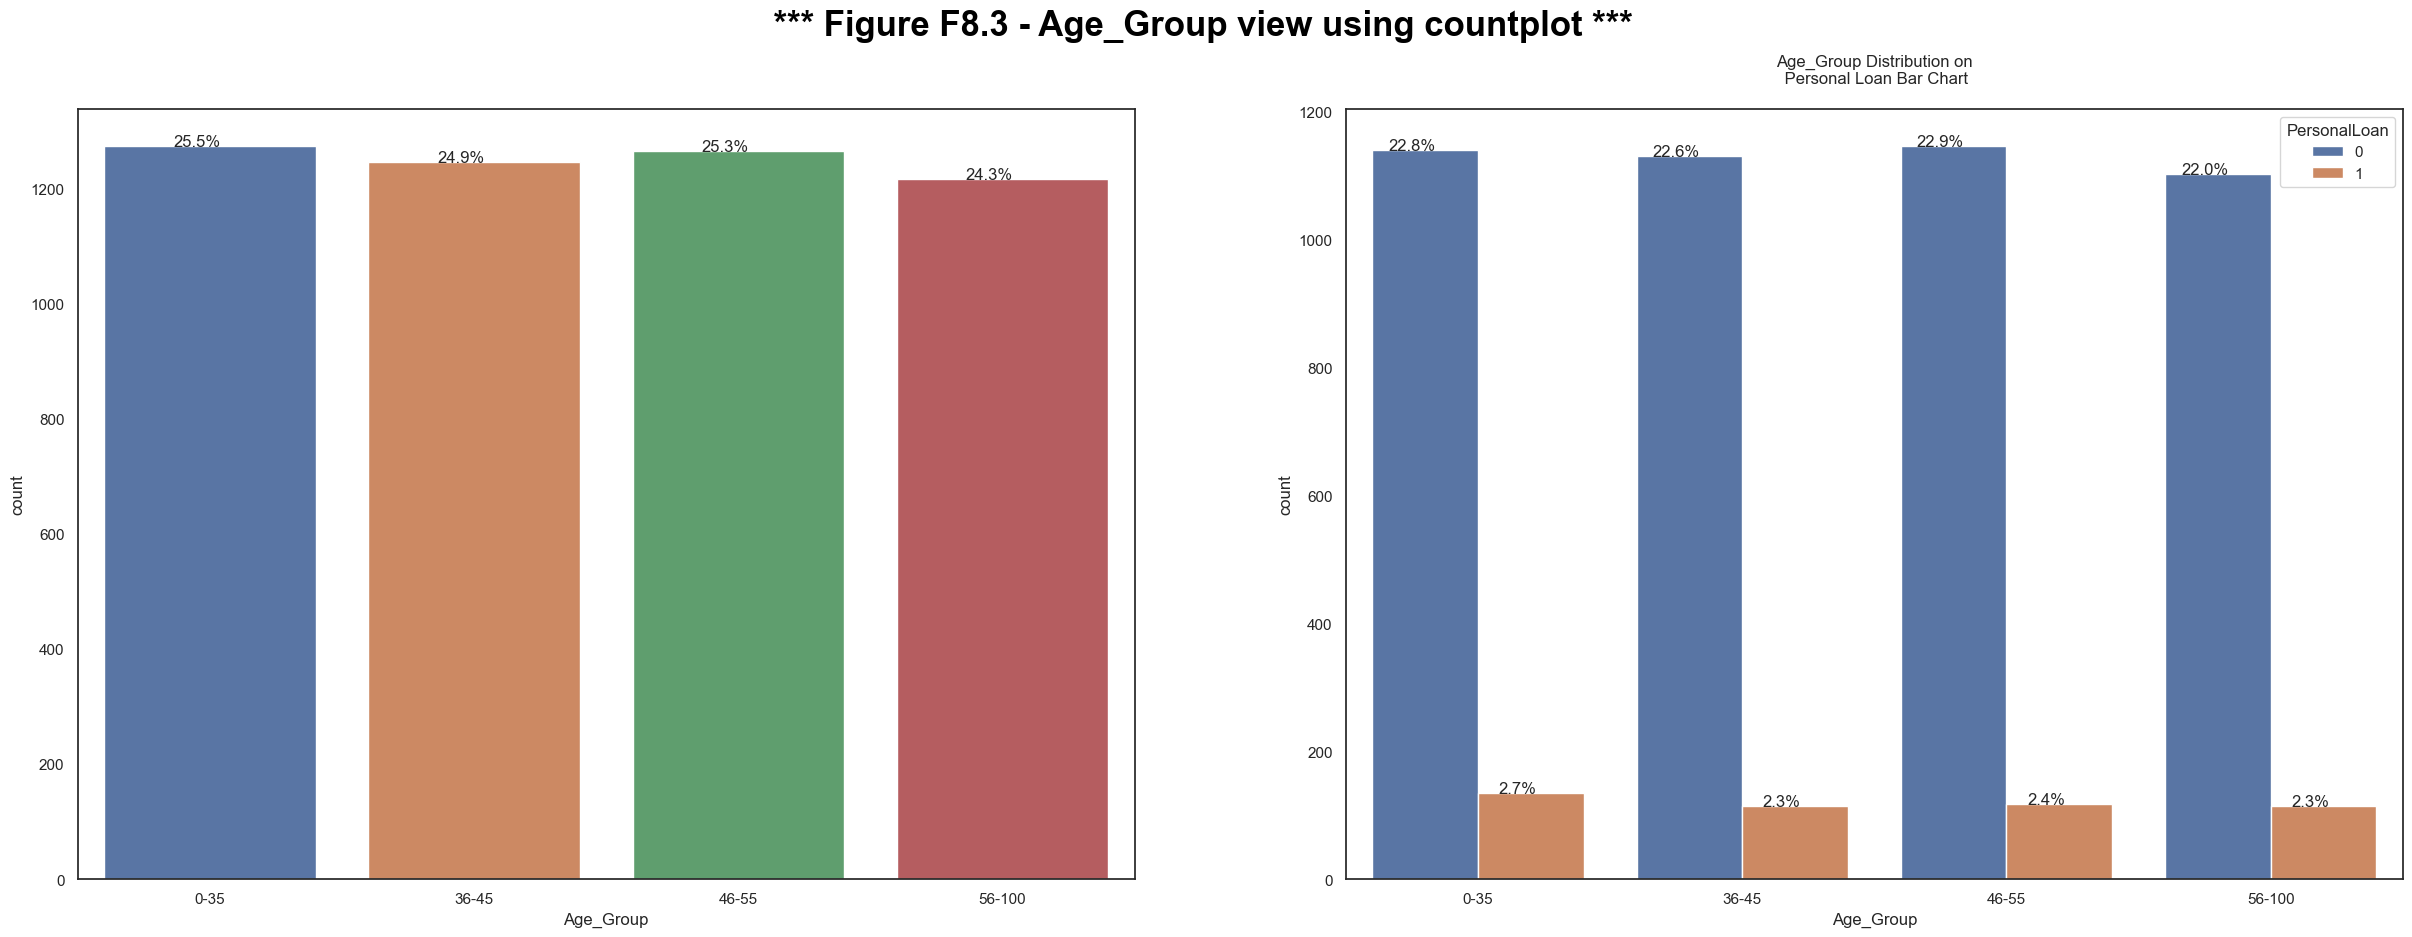

In [37]:
print("\n\n\n********************************==========================================********************************")
#plt.figure(figsize=(9,7)) 

fig, axes = plt.subplots(1, 2, figsize=(30, 10))
fig.suptitle(' *** Figure F8.1 - Annual_CCAvgSpending_Group view using countplot *** ', color = "black", fontsize=25, fontweight="bold")


plt1 = sns.countplot(data=personal_loan_data, x=personal_loan_data['Annual_CCAvgSpending_Group'], ax=axes[0])
for p in axes[0].patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/len(personal_loan_data['Annual_CCAvgSpending_Group']))
    x = p.get_x() + p.get_width() / 2 - 0.05
    y = p.get_height()
    plt1.annotate(percentage, (x, y),ha='center')

sns.countplot(x='Annual_CCAvgSpending_Group', hue=Target, data=personal_loan_data, ax=axes[1]).set(title='Annual_CCAvgSpending_Group Distribution on\n Personal Loan Bar Chart\n')
for p in axes[1].patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/len(personal_loan_data['Annual_CCAvgSpending_Group']))
    x = p.get_x() + p.get_width() / 2 - 0.05
    y = p.get_height()
    plt.annotate(percentage, (x, y),ha='center')

plt.show()



print("\n\n\n********************************==========================================********************************")
#plt.figure(figsize=(9,7)) 

fig, axes = plt.subplots(1, 2, figsize=(30, 10))
fig.suptitle(' *** Figure F8.2 - Income_Group view using countplot *** ', color = "black", fontsize=25, fontweight="bold")


plt1 = sns.countplot(data=personal_loan_data, x=personal_loan_data['Income_Group'], ax=axes[0])
for p in axes[0].patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/len(personal_loan_data['Income_Group']))
    x = p.get_x() + p.get_width() / 2 - 0.05
    y = p.get_height()
    plt1.annotate(percentage, (x, y),ha='center')

sns.countplot(x='Income_Group', hue=Target, data=personal_loan_data, ax=axes[1]).set(title='Income_Group Distribution on\n Personal Loan Bar Chart\n')
for p in axes[1].patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/len(personal_loan_data['Income_Group']))
    x = p.get_x() + p.get_width() / 2 - 0.05
    y = p.get_height()
    plt.annotate(percentage, (x, y),ha='center')

plt.show()

print("\n\n\n********************************==========================================********************************")
#plt.figure(figsize=(9,7)) 

fig, axes = plt.subplots(1, 2, figsize=(30, 10))
fig.suptitle(' *** Figure F8.3 - Age_Group view using countplot *** ', color = "black", fontsize=25, fontweight="bold")


plt1 = sns.countplot(data=personal_loan_data, x=personal_loan_data['Age_Group'], ax=axes[0])
for p in axes[0].patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/len(personal_loan_data['Age_Group']))
    x = p.get_x() + p.get_width() / 2 - 0.05
    y = p.get_height()
    plt1.annotate(percentage, (x, y),ha='center')

sns.countplot(x='Age_Group', hue=Target, data=personal_loan_data, ax=axes[1]).set(title='Age_Group Distribution on\n Personal Loan Bar Chart\n')
for p in axes[1].patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/len(personal_loan_data['Age_Group']))
    x = p.get_x() + p.get_width() / 2 - 0.05
    y = p.get_height()
    plt.annotate(percentage, (x, y),ha='center')

plt.show()

* Annual_CCAvgSpending_Group, Income_Group - created 4 group and all 4 group distribution more or less the same 
    but higher annual spender or income cuestomer are more likely to take up the personal loan
* Age_Group - All the 4 groups have alomst similar distribution in withloan and without loan in dataset 

In [38]:
personal_loan_data.head()

ID  Age  Experience  Income  PostalCode FamilySize  CCAvgSpending  \
0   1   25           1    49.0       91107          4            1.6   
1   2   45          19    34.0       90089          3            1.5   
2   3   39          15    11.0       94720          1            1.0   
3   4   35           9    61.0       94112          1            2.7   
4   5   35           8    45.0       91330          4            1.0   

   Education  Mortgage  InvestmentAccount  DepositAccount  InternetBanking  \
0  Undergrad         0                  1               0                0   
1  Undergrad         0                  1               0                0   
2  Undergrad         0                  0               0                0   
3   Graduate         0                  0               0                0   
4   Graduate         0                  0               0                0   

   PersonalLoan              CityName             Regions  \
0             0    Los Angeles County  Los Angeles Region   
1             0    Los Angeles County  Los Angeles Region   
2             0        Alameda County            Bay Area   
3             0  San Francisco County            Bay Area   
4             0    Los Angeles County  Los Angeles Region   

   Annual_CCAvgSpending Annual_CCAvgSpending_Group Income_Group Age_Group  
0                  19.2                       High     Moderate      0-35  
1                  18.0                   Moderate        Lower     36-45  
2                  12.0                   Moderate        Lower     36-45  
3                  32.4                  Very High     Moderate      0-35  
4                  12.0                   Moderate     Moderate      0-35

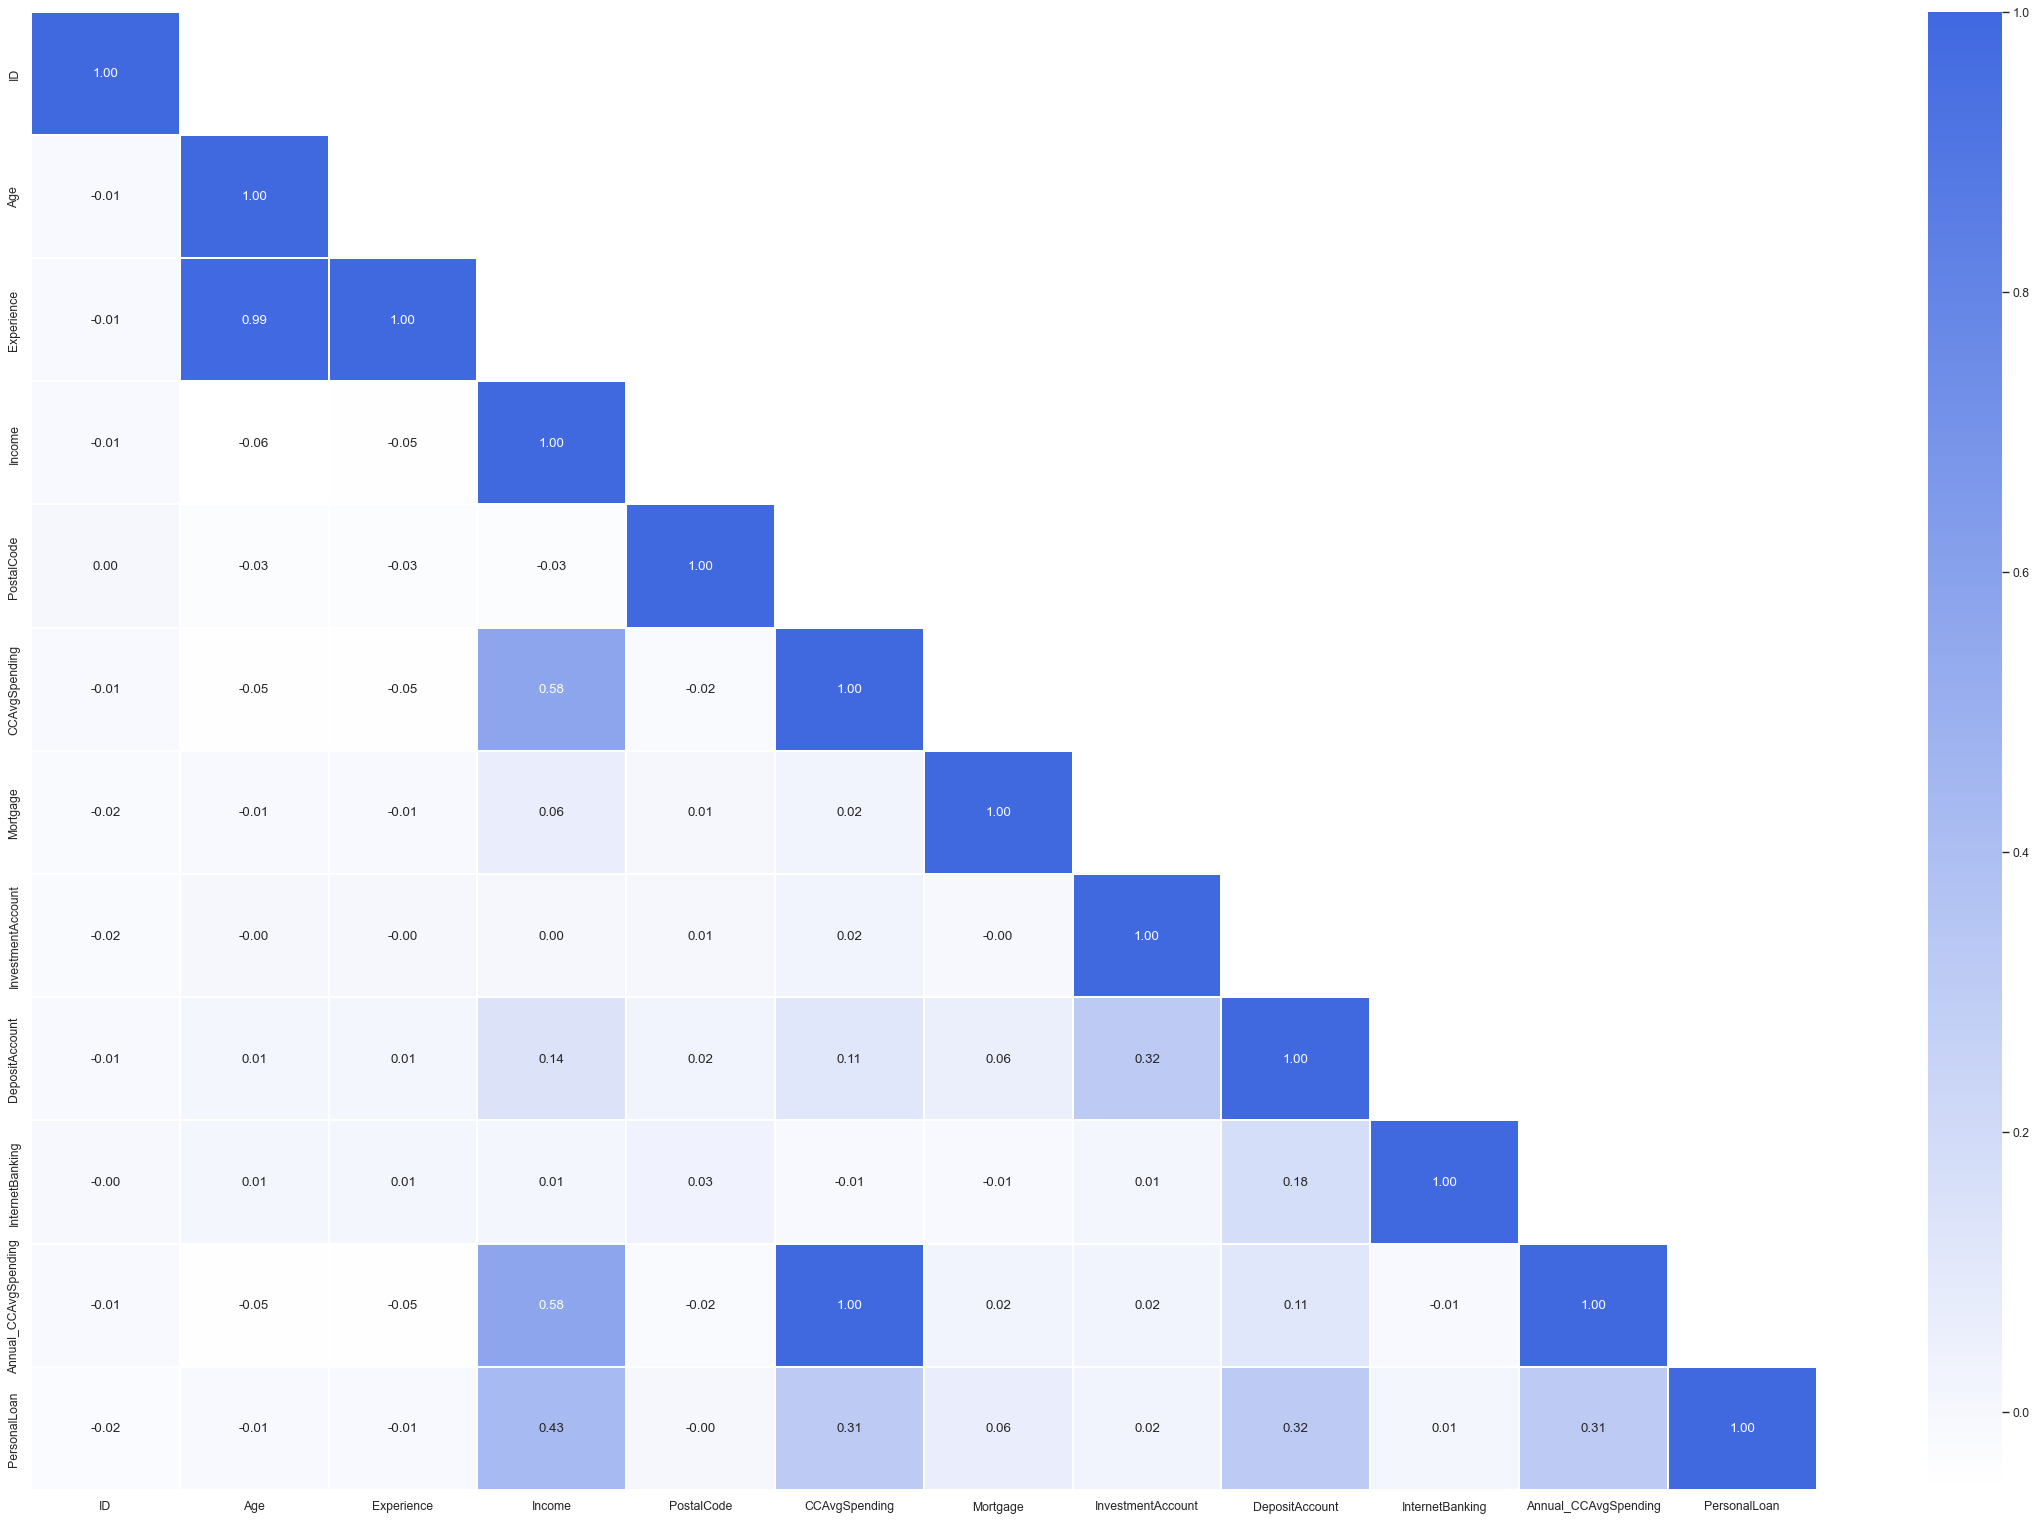

In [39]:
# Define a colormap
# reference - https://matplotlib.org/3.0.2/gallery/color/custom_cmap.html
royalblue = LinearSegmentedColormap.from_list('royalblue', [(0, (1,1,1)), (1, (0.25,0.41,0.88))])

target = 'PersonalLoan'
df = personal_loan_data


bank.spearman_correlation(df, target, royalblue)

In [40]:
personal_loan_data.describe().T

count          mean          std     min       25%  \
ID                    5000.0   2500.500000  1443.520003     1.0   1250.75   
Age                   5000.0     45.338400    11.463166    23.0     35.00   
Experience            5000.0     20.123600    11.433988     0.0     10.00   
Income                5000.0     73.795800    46.021974     0.0     39.00   
PostalCode            5000.0  93152.503000  2121.852197  9307.0  91911.00   
CCAvgSpending         5000.0      1.937938     1.747659     0.0      0.70   
Mortgage              5000.0     56.498800   101.713802     0.0      0.00   
InvestmentAccount     5000.0      0.104400     0.305809     0.0      0.00   
DepositAccount        5000.0      0.060400     0.238250     0.0      0.00   
InternetBanking       5000.0      0.596800     0.490589     0.0      0.00   
PersonalLoan          5000.0      0.096000     0.294621     0.0      0.00   
Annual_CCAvgSpending  5000.0     23.255256    20.971908     0.0      8.40   

                          50%       75%      max  
ID                     2500.5   3750.25   5000.0  
Age                      45.0     55.00     67.0  
Experience               20.0     30.00     43.0  
Income                   64.0     98.00    224.0  
PostalCode            93437.0  94608.00  96651.0  
CCAvgSpending             1.5      2.50     10.0  
Mortgage                  0.0    101.00    635.0  
InvestmentAccount         0.0      0.00      1.0  
DepositAccount            0.0      0.00      1.0  
InternetBanking           1.0      1.00      1.0  
PersonalLoan              0.0      0.00      1.0  
Annual_CCAvgSpending     18.0     30.00    120.0

# Below is the findings or insights:

1. Experience and Age gives a hight positive correlation which implies, as Experience increases Age also increases in Figure F6.0 and Experience and Age has positive correlation value of ***0.99*** in correlation plot.

1. Age - This feature is almost normally distributed where majority of customers are between age ***23*** to ***67*** years.Also we can see median is almost equal to mean in Figure F5.1. And ***Age_Group*** - All the 4 groups have alomst similar distribution in withloan and without loan in dataset in Figure F8.3.

1. Experience - This feature is also almost normally distibuted and mean is also almost equal to median in Figure F5.2. But there are some negative values present which we have treated during cleaning process.

1. We can see for **Income** , ***CCAvgSpending*** , ***Mortgage*** distribution is left skewed *(Required to perform transformation to convert into to normal distribution)* in Figure F5.3, F5.4, F5.5 respectively.

1. Income - This mean is greater than median in Figure F5.4. Also customers with higher income are more likely to take up the personal loan in Figure F8.2 for ***Income_Group*** and Income and CCAvgSpending is positively correlated with a correlation value of ***0.58***

1. Postal Code - Mapped each postal code to City using zipcodes library and mapped the city to regions while data processing. ***Regions*** - Customers are more from Bay Area with ***38.7%*** and even they are the one in all regions are likely to go for personal loan with ***3.9%*** in Figure F7.0.

1. From the above chart Figure F2.4, we can see that, the customers whose education vs personal loan distribution
> Education level is 1 (undergrad), having more income than the others customers whose education level is more!<br>
> The customers who has taken the Personal Loan have almost the same Income levels.<br>
> Also Customers with no Personal Loan, having education levels 2 and 3, also have same level of income.

1. CCAvgSpending - For this, ***Annual_CCAvgSpending*** - CCAvgSpending * 12 (To make it consistence with anuul income). ***Annual_CCAvgSpending_Group*** - Also customers with higher anual credit card spending are more likely to take up the personal loan in Figure F8.1.

1. Mortage - we can see that the customers have mortgage minimum of ***0k*** and the maximum value is ***635K*** in Figure F2.5 and in dataset discription.

1. Family - From the avove view Figure F2.6, we can find the insights that Families with income less than ***100K*** are less likely to take loan,than families with high income as well as in Figure F1.0, Family with member 4 are more likely to take personal loan.

1. Majority is the customers doesnot have Investment Account and majority customer have Personal loan who doesn't have have Investment Account in Figure F1.0

1. Many Customers without Deposit Account, have Personal loan Figure F1.0.

1. Customers with Internet Banking are more in taking loan in Figure F3.4

1. Customers with personal loan has higher Mortage than customer without personal loan in Figure F3.4


## Imbalance Dataset described below:
* This has 90.4% of customers who doesn’t opted the personal loan in last campaign and ***9.6%*** customer took. This observation convey that we have highly imbalance data set for modelling. If our all prediction will be wrong then still the model accuracy will be ***90.4%*** which is baseline model accuracy. 

* To handle this, we will be using ***stratification***. Stratification is an important step in splitting imbalanced datasets into training and test sets. Stratification ensures that the proportion of each class remains the same across both the training and test sets. This is important as it allows for a more accurate evaluation of the model, avoiding bias due to a disproportion of one class being over-represented in either dataset. Stratified sampling also ensures that any trends or correlations among different classes that exist within the overall dataset are preserved after splitting into training and test datasets:

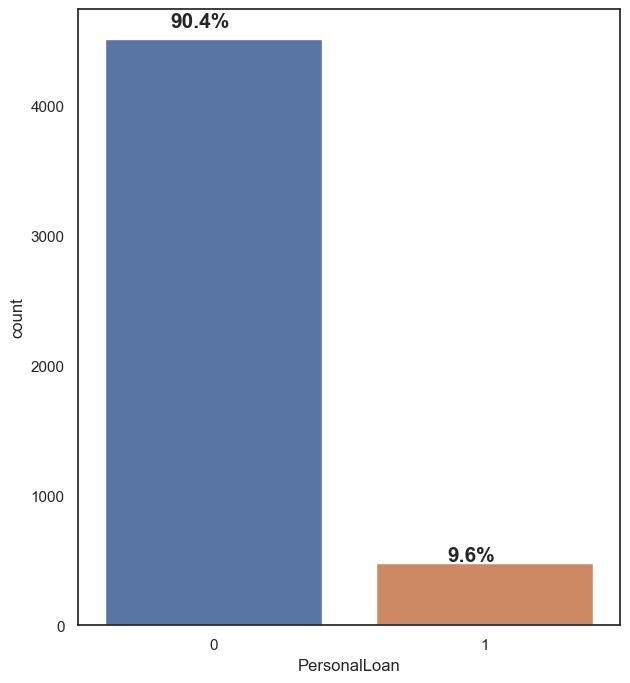

In [41]:
"""
plt.figure(dpi=80)

# Plot frequency percentages barplot
personal_loan_data['PersonalLoan'].value_counts(normalize=True).mul(100).plot(kind='barh', width=0.8, figsize=(8,5))

# Add frequency percentages to the plot
labels = personal_loan_data['PersonalLoan'].value_counts(normalize=True).mul(100).round(1)
for i in labels.index:
    plt.text(labels[i], i, str(labels[i])+ '%', fontsize=15, weight='bold')

plt.xlim([0, 110])
plt.xlabel('Frequency Percentage', fontsize=15)
plt.ylabel('Personal Loan', fontsize=15)
plt.title('Frequency Percentage of Target Classes', fontsize=15)
plt.show()
"""
plt.figure(figsize=(7,8))
fig.suptitle(' *** Target Classes (Personal Loan) view using countplot *** ', color = "black", fontsize=25, fontweight="bold")


ax = sns.countplot(data=personal_loan_data, x=personal_loan_data['PersonalLoan'])
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/len(personal_loan_data['PersonalLoan']))
    x = p.get_x() + p.get_width() / 2 - 0.05
    y = p.get_height() + (0.02 * p.get_height())
    plt.annotate(percentage, (x, y),ha='center',fontsize=15, weight='bold')
plt.show()

In [42]:
personal_loan_data.columns

Index(['ID', 'Age', 'Experience', 'Income', 'PostalCode', 'FamilySize',
       'CCAvgSpending', 'Education', 'Mortgage', 'InvestmentAccount',
       'DepositAccount', 'InternetBanking', 'PersonalLoan', 'CityName',
       'Regions', 'Annual_CCAvgSpending', 'Annual_CCAvgSpending_Group',
       'Income_Group', 'Age_Group'],
      dtype='object')

In [43]:
#df = personal_loan_data.copy()
print(personal_loan_data.info())

df = personal_loan_data.drop(columns=["ID", "Age_Group", "PostalCode","CityName",'Income_Group','CCAvgSpending', 'Annual_CCAvgSpending_Group'], inplace=False)
print(df.info())

dummies_oneHotCols=['Regions','Education', 'FamilySize']

model_data = pd.get_dummies(df,columns=dummies_oneHotCols,drop_first=True)
model_data


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 19 columns):
 #   Column                      Non-Null Count  Dtype   
---  ------                      --------------  -----   
 0   ID                          5000 non-null   int64   
 1   Age                         5000 non-null   int64   
 2   Experience                  5000 non-null   int64   
 3   Income                      5000 non-null   float64 
 4   PostalCode                  5000 non-null   int64   
 5   FamilySize                  5000 non-null   category
 6   CCAvgSpending               5000 non-null   float64 
 7   Education                   5000 non-null   category
 8   Mortgage                    5000 non-null   int64   
 9   InvestmentAccount           5000 non-null   int32   
 10  DepositAccount              5000 non-null   int32   
 11  InternetBanking             5000 non-null   int64   
 12  PersonalLoan                5000 non-null   int64   
 13  CityName          

Age  Experience  Income  Mortgage  InvestmentAccount  DepositAccount  \
0      25           1    49.0         0                  1               0   
1      45          19    34.0         0                  1               0   
2      39          15    11.0         0                  0               0   
3      35           9    61.0         0                  0               0   
4      35           8    45.0         0                  0               0   
...   ...         ...     ...       ...                ...             ...   
4995   29           3    40.0         0                  0               0   
4996   30           4    15.0        85                  0               0   
4997   63          39    24.0         0                  0               0   
4998   65          40    49.0         0                  0               0   
4999   28           4    83.0         0                  0               0   

      InternetBanking  PersonalLoan  Annual_CCAvgSpending  Regions_Central  \
0                   0             0                  19.2                0   
1                   0             0                  18.0                0   
2                   0             0                  12.0                0   
3                   0             0                  32.4                0   
4                   0             0                  12.0                0   
...               ...           ...                   ...              ...   
4995                1             0                  22.8                0   
4996                1             0                   4.8                0   
4997                0             0                   3.6                0   
4998                1             0                   6.0                0   
4999                1             0                   9.6                0   

      Regions_Los Angeles Region  Regions_Other  Regions_Southern  \
0                              1              0                 0   
1                              1              0                 0   
2                              0              0                 0   
3                              0              0                 0   
4                              1              0                 0   
...                          ...            ...               ...   
4995                           0              0                 1   
4996                           0              0                 1   
4997                           0              0                 1   
4998                           1              0                 0   
4999                           0              0                 1   

      Regions_Superior  Education_Graduate  Education_Undergrad  FamilySize_2  \
0                    0                   0                    1             0   
1                    0                   0                    1             0   
2                    0                   0                    1             0   
3                    0                   1                    0             0   
4                    0                   1                    0             0   
...                ...                 ...                  ...           ...   
4995                 0                   0                    0             0   
4996                 0                   0                    1             0   
4997                 0                   0                    0             1   
4998                 0                   1                    0             0   
4999                 0                   0                    1             0   

      FamilySize_3  FamilySize_4  
0                0             1  
1                1             0  
2                0             0  
3                0             0  
4                0             1  
...            ...           ...  
4995             0             0  
4996             0             1  
4997           

In [44]:
model_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 19 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         5000 non-null   int64  
 1   Experience                  5000 non-null   int64  
 2   Income                      5000 non-null   float64
 3   Mortgage                    5000 non-null   int64  
 4   InvestmentAccount           5000 non-null   int32  
 5   DepositAccount              5000 non-null   int32  
 6   InternetBanking             5000 non-null   int64  
 7   PersonalLoan                5000 non-null   int64  
 8   Annual_CCAvgSpending        5000 non-null   float64
 9   Regions_Central             5000 non-null   uint8  
 10  Regions_Los Angeles Region  5000 non-null   uint8  
 11  Regions_Other               5000 non-null   uint8  
 12  Regions_Southern            5000 non-null   uint8  
 13  Regions_Superior            5000 

## Splited the data into Training and Test dataset with 80-20 rule.

In [45]:
X = model_data.drop(['PersonalLoan'], axis=1)
y = model_data['PersonalLoan']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0, stratify=y)


In [46]:
split_distribution = y.value_counts().to_frame()
split_distribution.columns = ['Dataset']

Dataset_percentage = y.value_counts(normalize=True).mul(100).to_frame()
Dataset_percentage.PersonalLoan = Dataset_percentage.PersonalLoan.astype('str')
Dataset_percentage.PersonalLoan = Dataset_percentage.PersonalLoan + '%'

train_distribution = y_train.value_counts().to_frame()

train_percentage = y_train.value_counts(normalize=True).mul(100).to_frame()
train_percentage.PersonalLoan = train_percentage.PersonalLoan.astype('str')
train_percentage.PersonalLoan = train_percentage.PersonalLoan + '%'

test_distribution = y_test.value_counts().to_frame()

test_percentage = y_test.value_counts(normalize=True).mul(100).to_frame()
test_percentage.PersonalLoan = test_percentage.PersonalLoan.astype('str')
test_percentage.PersonalLoan = test_percentage.PersonalLoan + '%'

split_distribution['Dataset_percentage'] = Dataset_percentage.PersonalLoan
split_distribution['Training_Dataset'] = train_distribution.PersonalLoan
split_distribution['Training_percentage'] = train_percentage.PersonalLoan
split_distribution['Test_Dataset'] = test_distribution.PersonalLoan
split_distribution['Test_percentage'] = test_percentage.PersonalLoan
split_distribution

Dataset Dataset_percentage  Training_Dataset Training_percentage  \
0     4520              90.4%              3164               90.4%   
1      480               9.6%               336                9.6%   

   Test_Dataset Test_percentage  
0          1356           90.4%  
1           144            9.6%

In [47]:
print("length of X_train - ", len(X_train.columns), "\n", X_train.columns, "length of X_test - ", len(X_test.columns), "\n", X_test.columns)



length of X_train -  18 
 Index(['Age', 'Experience', 'Income', 'Mortgage', 'InvestmentAccount',
       'DepositAccount', 'InternetBanking', 'Annual_CCAvgSpending',
       'Regions_Central', 'Regions_Los Angeles Region', 'Regions_Other',
       'Regions_Southern', 'Regions_Superior', 'Education_Graduate',
       'Education_Undergrad', 'FamilySize_2', 'FamilySize_3', 'FamilySize_4'],
      dtype='object') length of X_test -  18 
 Index(['Age', 'Experience', 'Income', 'Mortgage', 'InvestmentAccount',
       'DepositAccount', 'InternetBanking', 'Annual_CCAvgSpending',
       'Regions_Central', 'Regions_Los Angeles Region', 'Regions_Other',
       'Regions_Southern', 'Regions_Superior', 'Education_Graduate',
       'Education_Undergrad', 'FamilySize_2', 'FamilySize_3', 'FamilySize_4'],
      dtype='object')


### Multi-Colinearlity Check - removomed the columns:

In [48]:
x = X_train
#print(x)

print("\n\n\n VIF Calculation below before check :\n", bank.VIF_Calculation(x))

X_train.drop(columns=["Age"], inplace=True)
X_test.drop(columns=["Age"], inplace=True)

print("\n\n\n VIF Calculation below After check :\n", bank.VIF_Calculation(x))




 VIF Calculation below before check :
                      variables        VIF
0                          Age  48.602223
1                   Experience  22.661252
2                       Income   6.598684
3                     Mortgage   1.375950
4            InvestmentAccount   1.269734
5               DepositAccount   1.299374
6              InternetBanking   2.504493
7         Annual_CCAvgSpending   3.814399
8              Regions_Central   1.231512
9   Regions_Los Angeles Region   1.563334
10               Regions_Other   1.006800
11            Regions_Southern   1.738192
12            Regions_Superior   1.049482
13          Education_Graduate   1.906526
14         Education_Undergrad   2.456059
15                FamilySize_2   1.871054
16                FamilySize_3   1.739266
17                FamilySize_4   1.865461



 VIF Calculation below After check :
                      variables       VIF
0                   Experience  3.106799
1                       Income  6.011

# Modeling 

* ***Modeling with 5 different algorithms:***
     - Logistic Regression
     - Random Forest
     - Decision Tree
     - XGBoost Classifier
     - Support Vector Machines

Logistic Regression - Fit the model on 70% of dataset and test on 30% of dataset - implemented below
Ploting Training dataset Confusion Matrix below:


<Figure size 640x480 with 0 Axes>

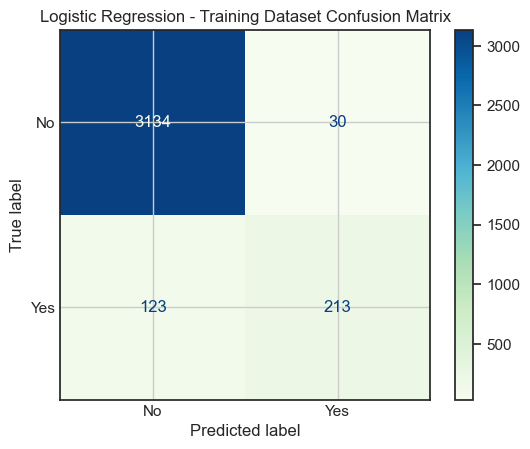




Ploting Test dataset Confusion Matrix below:


<Figure size 640x480 with 0 Axes>

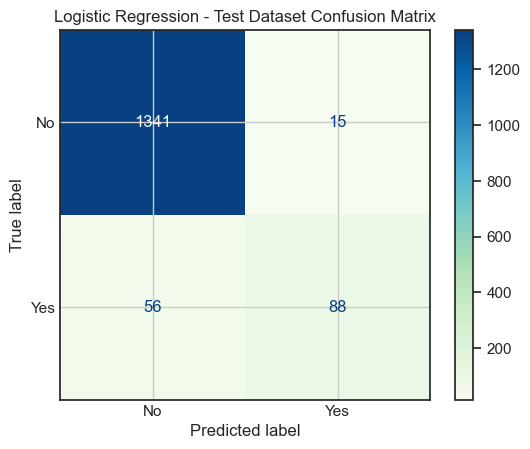




Ploting ROC-AUC Plot Below:


<Figure size 640x480 with 0 Axes>

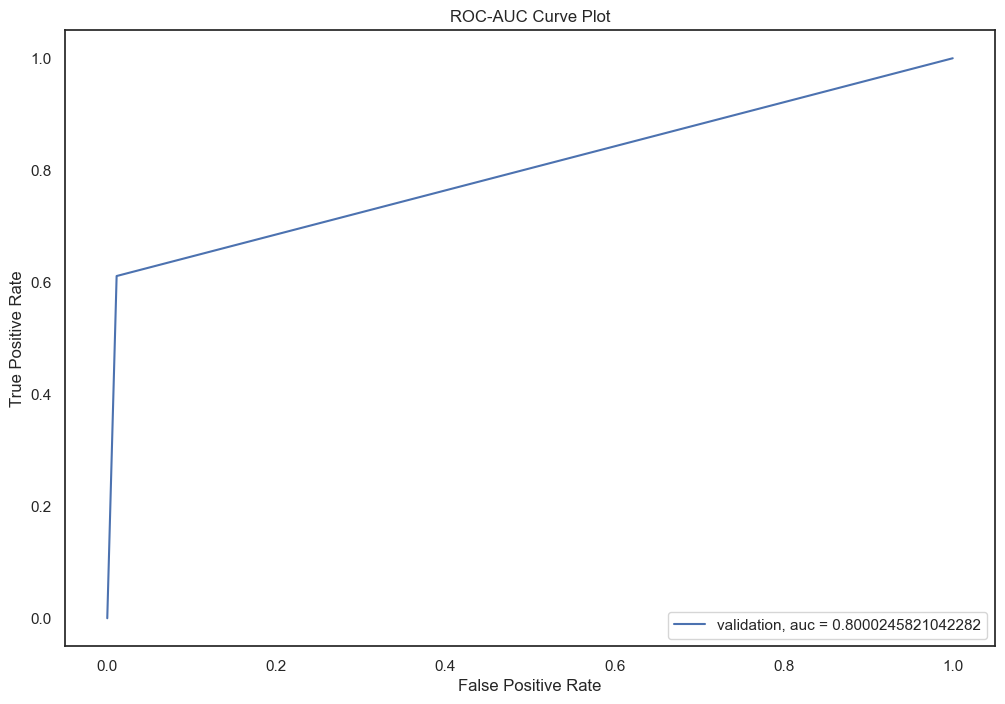



We got an auc value of  0.8

1 of kfold 5 
accuracy_score 0.952

2 of kfold 5 
accuracy_score 0.947

3 of kfold 5 
accuracy_score 0.97

4 of kfold 5 
accuracy_score 0.965

5 of kfold 5 
accuracy_score 0.952

 Mean Validation Accuracy using StratifiedKFold 95.72%
Random Forest - Fit the model on 70% of dataset and test on 30% of dataset - implemented below
Ploting Training dataset Confusion Matrix below:


<Figure size 640x480 with 0 Axes>

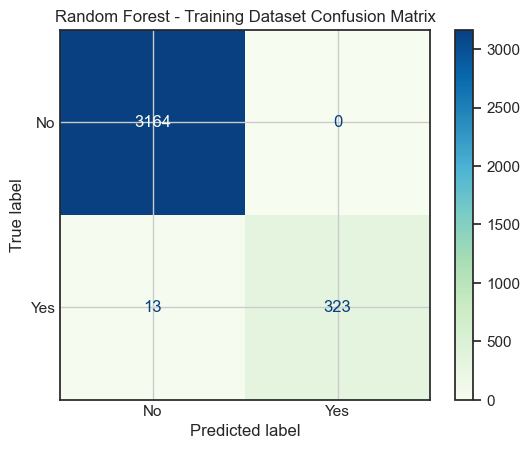




Ploting Test dataset Confusion Matrix below:


<Figure size 640x480 with 0 Axes>

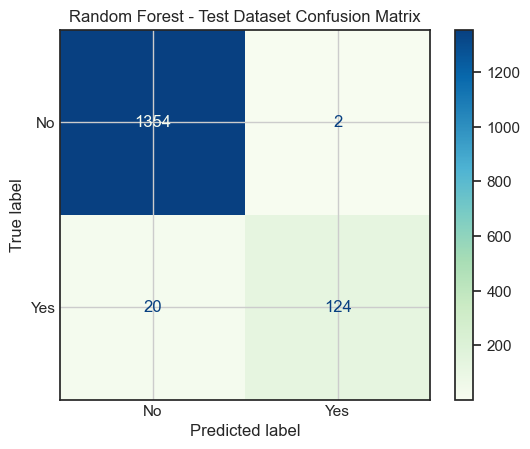




Ploting ROC-AUC Plot Below:


<Figure size 640x480 with 0 Axes>

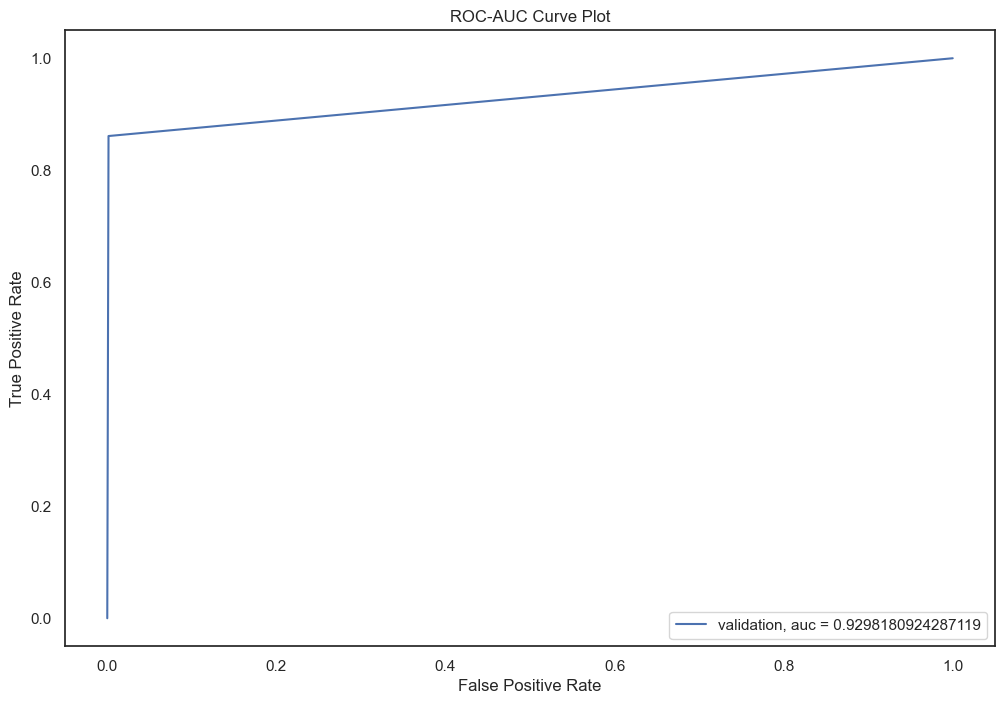



We got an auc value of  0.93

1 of kfold 5 
accuracy_score 0.991

2 of kfold 5 
accuracy_score 0.979

3 of kfold 5 
accuracy_score 0.989

4 of kfold 5 
accuracy_score 0.986

5 of kfold 5 
accuracy_score 0.981

 Mean Validation Accuracy using StratifiedKFold 98.52%
Decision Tree - Fit the model on 70% of dataset and test on 30% of dataset - implemented below
Ploting Training dataset Confusion Matrix below:


<Figure size 640x480 with 0 Axes>

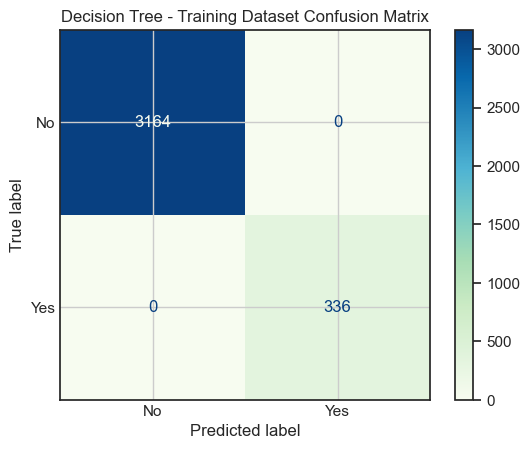




Ploting Test dataset Confusion Matrix below:


<Figure size 640x480 with 0 Axes>

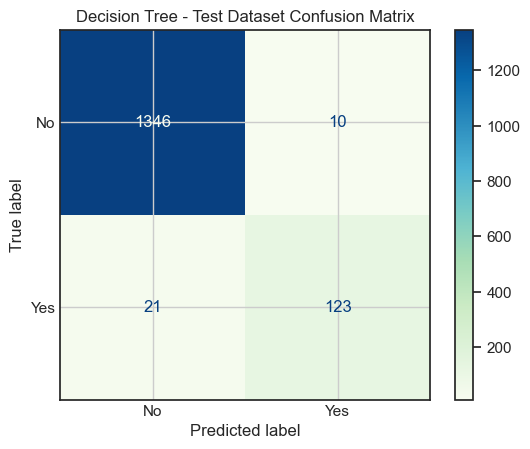




Ploting ROC-AUC Plot Below:


<Figure size 640x480 with 0 Axes>

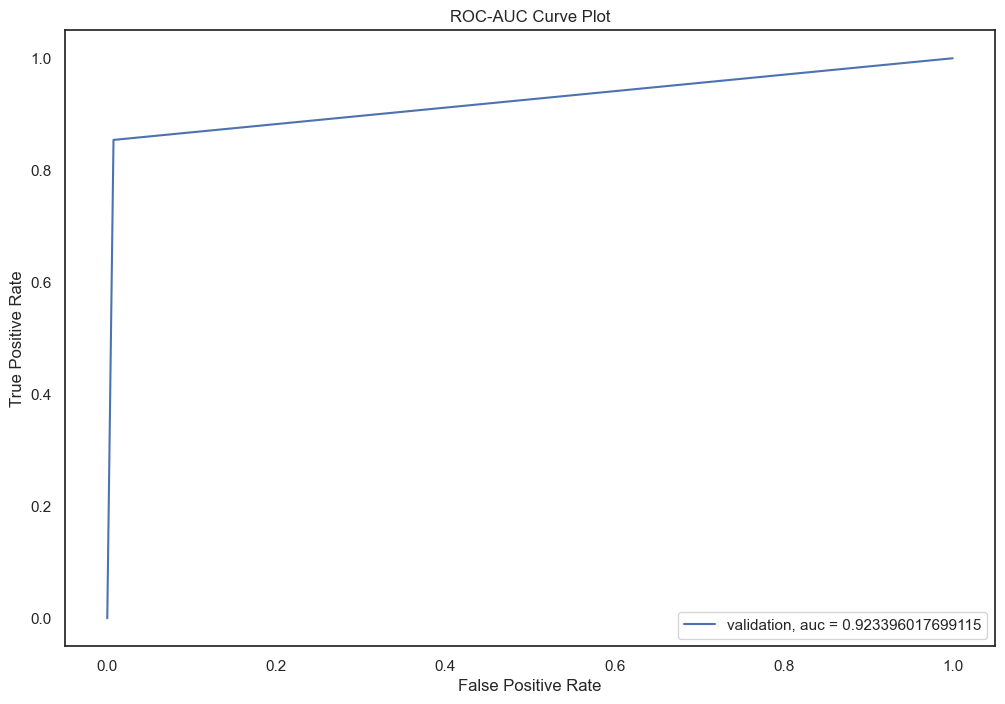



We got an auc value of  0.92

1 of kfold 5 
accuracy_score 0.987

2 of kfold 5 
accuracy_score 0.982

3 of kfold 5 
accuracy_score 0.98

4 of kfold 5 
accuracy_score 0.981

5 of kfold 5 
accuracy_score 0.975

 Mean Validation Accuracy using StratifiedKFold 98.1%
Invalid Model Name...!!!
XGBoost Classifier - Fit the model on 70% of dataset and test on 30% of dataset - implemented below
Ploting Training dataset Confusion Matrix below:


<Figure size 640x480 with 0 Axes>

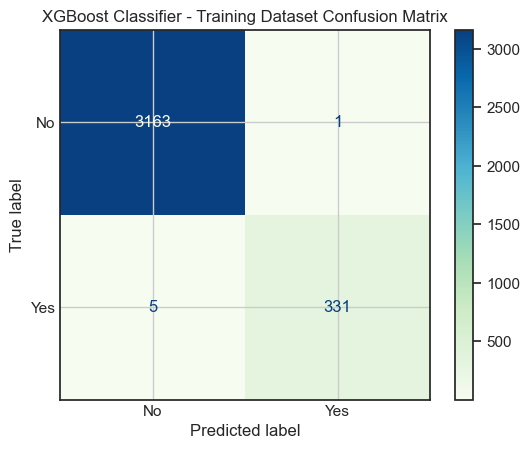




Ploting Test dataset Confusion Matrix below:


<Figure size 640x480 with 0 Axes>

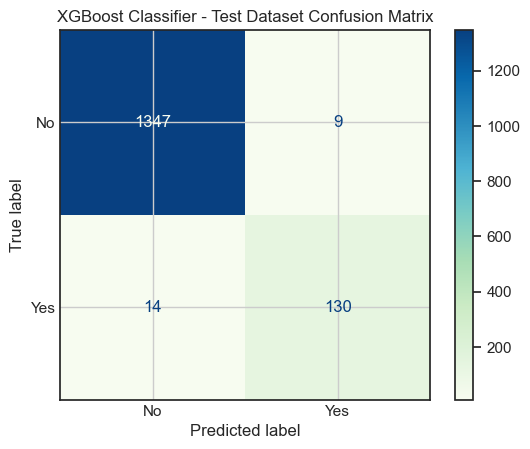




Ploting ROC-AUC Plot Below:


<Figure size 640x480 with 0 Axes>

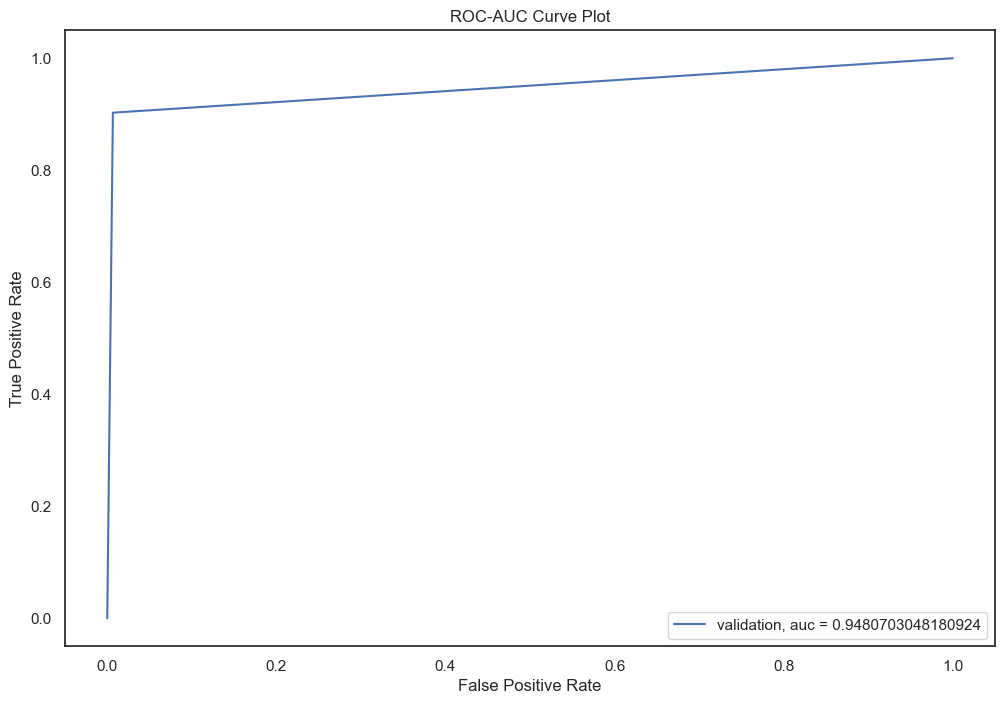



We got an auc value of  0.95

1 of kfold 5 
accuracy_score 0.99

2 of kfold 5 
accuracy_score 0.982

3 of kfold 5 
accuracy_score 0.988

4 of kfold 5 
accuracy_score 0.992

5 of kfold 5 
accuracy_score 0.979

 Mean Validation Accuracy using StratifiedKFold 98.62%
Support Vector Machines - Fit the model on 70% of dataset and test on 30% of dataset - implemented below
Ploting Training dataset Confusion Matrix below:


<Figure size 640x480 with 0 Axes>

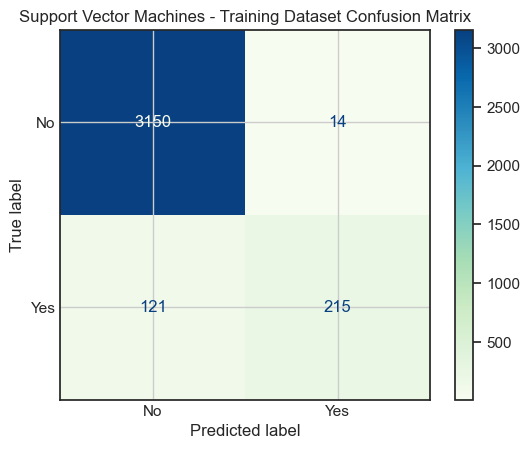




Ploting Test dataset Confusion Matrix below:


<Figure size 640x480 with 0 Axes>

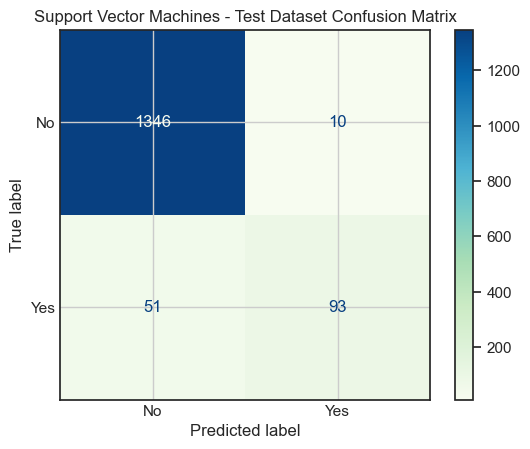




Ploting ROC-AUC Plot Below:


<Figure size 640x480 with 0 Axes>

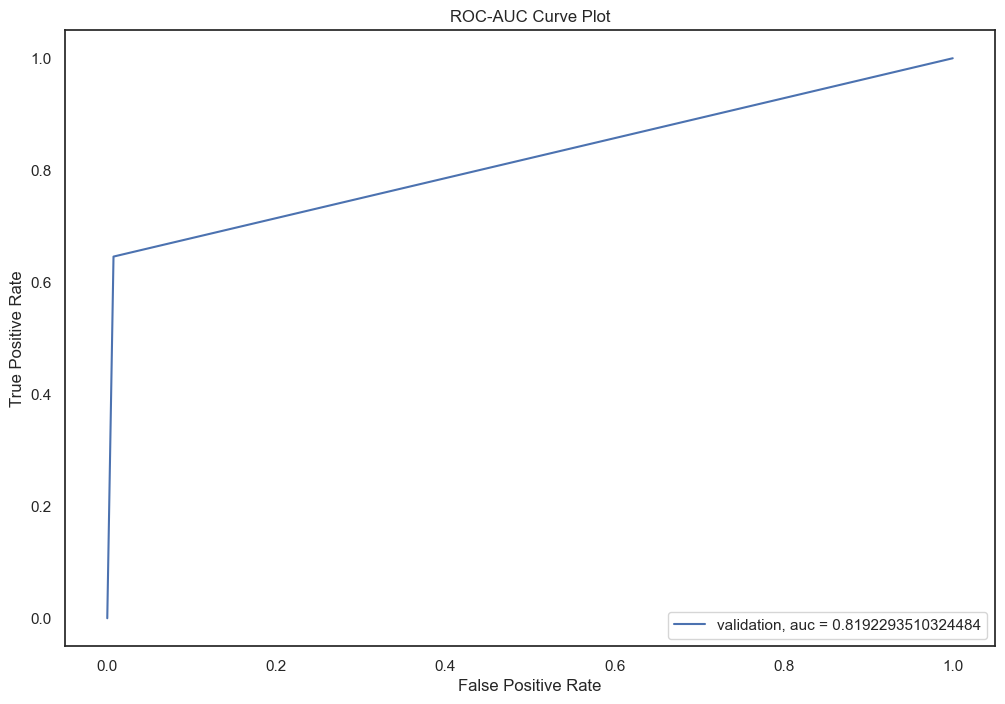



We got an auc value of  0.82

1 of kfold 5 
accuracy_score 0.954

2 of kfold 5 
accuracy_score 0.95

3 of kfold 5 
accuracy_score 0.97

4 of kfold 5 
accuracy_score 0.967

5 of kfold 5 
accuracy_score 0.949

 Mean Validation Accuracy using StratifiedKFold 95.8%


Model Name Train Accuracy Test Accuracy Train Recall  \
0      Logistic Regression         95.63%        95.27%       63.39%   
0            Random Forest         99.63%        98.53%       96.13%   
0            Decision Tree         100.0%        97.93%       100.0%   
0       XGBoost Classifier         99.83%        98.47%       98.51%   
0  Support Vector Machines         96.14%        95.93%       63.99%   

  Test Recall Train Precision Test Precision  \
0      61.11%          87.65%         85.44%   
0      86.11%          100.0%         98.41%   
0      85.42%          100.0%         92.48%   
0      90.28%           99.7%         93.53%   
0      64.58%          93.89%         90.29%   

  Cross Validation using StratifiedKFold - Mean  
0                                        95.72%  
0                                        98.52%  
0                                         98.1%  
0                                        98.62%  
0                                         95.8%

In [49]:
all_model_scores = pd.DataFrame({  'Model Name': pd.Series(dtype='str')
                       , 'Train Accuracy': pd.Series(dtype='str')
                       , 'Test Accuracy': pd.Series(dtype='str')
                       , 'Train Recall': pd.Series(dtype='str')
                       , 'Test Recall': pd.Series(dtype='str')
                       , 'Train Precision': pd.Series(dtype='str')
                       , 'Test Precision': pd.Series(dtype='str')
                       , "Cross Validation using StratifiedKFold - Mean" : pd.Series(dtype='str')
                     }).reset_index().drop(columns=['index'])

algorithm_name_list = ["Logistic Regression", "Random Forest", "Decision Tree", "Invalid", "XGBoost Classifier", "Support Vector Machines"]


for algorithm_name in algorithm_name_list:
    if algorithm_name == "Logistic Regression":
        print("Logistic Regression - Fit the model on 70% of dataset and test on 30% of dataset - implemented below")
        model = LogisticRegression(random_state=1)
    elif algorithm_name == "Random Forest":
        print("Random Forest - Fit the model on 70% of dataset and test on 30% of dataset - implemented below")
        model = RandomForestClassifier(random_state=1, max_depth=10)
    elif algorithm_name == "Decision Tree":
        print("Decision Tree - Fit the model on 70% of dataset and test on 30% of dataset - implemented below")
        model = tree.DecisionTreeClassifier(random_state=1)
    elif algorithm_name == "XGBoost Classifier":
        print("XGBoost Classifier - Fit the model on 70% of dataset and test on 30% of dataset - implemented below")
        model = XGBClassifier(n_estimators=50, max_depth=4) 
    elif algorithm_name == "Support Vector Machines":
        print("Support Vector Machines - Fit the model on 70% of dataset and test on 30% of dataset - implemented below")
        model = SVC(kernel='linear', C = 1,gamma = 'auto', probability = True)
    else:
        print("Invalid Model Name...!!!")
        continue
    
    model.fit(X_train, y_train)
    predict_test = model.predict(X_test)
    predict_train = model.predict(X_train)
    
    model_score = bank.model_scores_and_confusion_matrix_with_plot(algorithm_name
                                                         , y_train
                                                         , predict_train
                                                         , algorithm_name + " - Training Dataset Confusion Matrix"
                                                         , y_test
                                                         , predict_test
                                                         , algorithm_name + " - Test Dataset Confusion Matrix")

    #print(model_score)
    model_score["Cross Validation using StratifiedKFold - Mean"] = bank.cross_validation_using_StratifiedKFold(X,y, model)
    all_model_scores = all_model_scores.append(model_score)

all_model_scores

#


In [50]:
!python -V

Python 3.9.13


In [51]:
!pip3 install xgboost

In [52]:
"""
#Logistic Regression - Fit the model on 70% of dataset and test on 30% of dataset - implemented below
model = LogisticRegression(random_state=1)
model.fit(X_train, y_train)
predict_test = model.predict(X_test)
predict_train = model.predict(X_train)

model_score = bank.model_scores_and_confusion_matrix_with_plot("Logistic Regression"
                                                         , y_train
                                                         , predict_train
                                                         , "Training Dataset Confusion Matrix"
                                                         , y_test
                                                         , predict_test
                                                         , "Test Dataset Confusion Matrix")

#print(model_score)
model_score["Cross Validation using StratifiedKFold - Mean"] = bank.cross_validation_using_StratifiedKFold(X,y, model)
all_model_scores = all_model_scores.append(model_score)
#all_model_scores

#Random Forest - Fit the model on 70% of dataset and test on 30% of dataset - implemented below
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree
model = RandomForestClassifier(random_state=1, max_depth=10)
model.fit(X_train, y_train)
predict_test = model.predict(X_test)
predict_train = model.predict(X_train)

model_score = bank.model_scores_and_confusion_matrix_with_plot("Random Forest"
                                                         , y_train
                                                         , predict_train
                                                         , "Training Dataset Confusion Matrix"
                                                         , y_test
                                                         , predict_test
                                                         , "Test Dataset Confusion Matrix")

#print(model_score)
model_score["Cross Validation using StratifiedKFold - Mean"] = bank.cross_validation_using_StratifiedKFold(X,y, model)
all_model_scores = all_model_scores.append(model_score)
all_model_scores
"""

'\n#Logistic Regression - Fit the model on 70% of dataset and test on 30% of dataset - implemented below\nmodel = LogisticRegression(random_state=1)\nmodel.fit(X_train, y_train)\npredict_test = model.predict(X_test)\npredict_train = model.predict(X_train)\n\nmodel_score = bank.model_scores_and_confusion_matrix_with_plot("Logistic Regression"\n                                                         , y_train\n                                                         , predict_train\n                                                         , "Training Dataset Confusion Matrix"\n                                                         , y_test\n                                                         , predict_test\n                                                         , "Test Dataset Confusion Matrix")\n\n#print(model_score)\nmodel_score["Cross Validation using StratifiedKFold - Mean"] = bank.cross_validation_using_StratifiedKFold(X,y, model)\nall_model_scores = all_model_scores.appen